In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib.font_manager import FontProperties
import pickle as pkl
import sys
import os
sys.path.append('/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/Model_utils/')
import other_billeh_utils
from tqdm import tqdm
import pandas as pd

font = FontProperties()
font.set_weight('bold')

colors = ['darkviolet', 'lightseagreen', 'goldenrod']
labels = ['V1', 'LGN', 'LM']

num_v1_neurons = 51978
num_lgn_neurons = 17400
num_lm_neurons = 7414

# Load model
cache_path = '/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/Model_utils/.cache/lm_v1_network_v1_90000_lm_30000.pkl'
with open(cache_path, 'rb') as f:
    networks, lgn_inputs, bkg_inputs = pkl.load(f)

# load indices to remove from rf significance
with open ('RF_significant_neurons_v1.pkl', 'rb') as f:
    significant_indices_RF_v1 = pkl.load(f)

with open ('RF_significant_neurons_lm.pkl', 'rb') as f:
    significant_indices_RF_lm = pkl.load(f)

with open('RF_significant_neurons_v1_dis.pkl', 'rb') as f:
    significant_indices_RF_v1_dis = pkl.load(f)

In [2]:
# load the dataframes
path_v1 = "/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/Benchmark_models/v1_90000_lm_30000/v1_features_df.csv"
path_lm = "/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/Benchmark_models/v1_90000_lm_30000/lm_features_df.csv"

df_v1 = pd.read_csv(path_v1)
df_lm = pd.read_csv(path_lm)

In [3]:
# Filters for selecting only the excitatory neurons and having them classified in layers
# networks['v1'].keys() to visualize the keys of the dictionary

# obtain the neuron type of each neuron 
new_pop_names = other_billeh_utils.pop_names(networks['v1'], n_selected_neurons=51978, data_dir='/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/GLIF_network')
cell_types_v1 = [other_billeh_utils.pop_name_to_cell_type(pop_name) for pop_name in new_pop_names]

new_pop_names = other_billeh_utils.pop_names(networks['lm'], n_selected_neurons=7414, data_dir='/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/GLIF_network')
cell_types_lm = [other_billeh_utils.pop_name_to_cell_type(pop_name) for pop_name in new_pop_names]

cell_types = [cell_types_v1, cell_types_lm]

unique_cell_types = list(set(cell_types_v1))
unique_cell_types = sorted(unique_cell_types)

# Do a mask for exc. + inh. for each layer of each region
layer_mask_v1 = [[cell_type.startswith(f'L{i}') for cell_type in cell_types[0]] for i in ["1","2/3","4","5","6"]]
layer_mask_lm = [[cell_type.startswith(f'L{i}') for cell_type in cell_types[1]] for i in ["1","2/3","4","5","6"]]

# Do a mask for neuron types in each layer of each region 
# The unique neuron types are stored in unique_cell_types
layer_mask_v1_types = [[cell_type == unique_cell_types[i] for cell_type in cell_types[0]] for i in range(len(unique_cell_types))]
layer_mask_lm_types = [[cell_type == unique_cell_types[i] for cell_type in cell_types[1]] for i in range(len(unique_cell_types))]


# Load data

In [3]:
# WHITE CONNECTED
# Path to the data file
data_file = 'Data/simulation_data_white_connected.hdf5'

# Open the file in read mode
file = h5py.File(data_file, 'r')

# Access the 'Data' group
data_group = file['Data']

# Initialize a dictionary to hold the data
data = {}

# Loop over the subgroups ('v1', 'lm', 'LGN')
for subgroup_name in data_group.keys():
    # Access the subgroup
    subgroup = data_group[subgroup_name]
    
    # Access the 'z' dataset in the subgroup
    dataset = subgroup['z']
    
    # Convert the dataset to a numpy array and store it in the dictionary
    data[subgroup_name] = np.array(dataset)

# Close the file
file.close()

print("1/4")

v1_white = data['v1']
lm_white = data['lm']
lgn_white = data['LGN']
print(v1_white.shape)
print(lm_white.shape)
print(lgn_white.shape)

# BLACK CONNECTED
# Path to the data file
data_file = 'Data/simulation_data_black_connected.hdf5'

# Open the file in read mode
file = h5py.File(data_file, 'r')

# Access the 'Data' group
data_group = file['Data']

# Initialize a dictionary to hold the data
data = {}

# Loop over the subgroups ('v1', 'lm', 'LGN')
for subgroup_name in data_group.keys():
    # Access the subgroup
    subgroup = data_group[subgroup_name]
    
    # Access the 'z' dataset in the subgroup
    dataset = subgroup['z']
    
    # Convert the dataset to a numpy array and store it in the dictionary
    data[subgroup_name] = np.array(dataset)

# Close the file
file.close()

v1_black = data['v1']
lm_black = data['lm']
lgn_black = data['LGN']
print(v1_black.shape)
print(lm_black.shape)
print(lgn_black.shape)

print("2/4")

# WHITE DISCONNECTED
# Path to the data file
data_file = 'Data/simulation_data_white_disconnected.hdf5'

# Open the file in read mode
file = h5py.File(data_file, 'r')

# Access the 'Data' group
data_group = file['Data']

# Initialize a dictionary to hold the data
data = {}

# Loop over the subgroups ('v1', 'lm', 'LGN')
for subgroup_name in data_group.keys():
    # Access the subgroup
    subgroup = data_group[subgroup_name]
    
    # Access the 'z' dataset in the subgroup
    dataset = subgroup['z']
    
    # Convert the dataset to a numpy array and store it in the dictionary
    data[subgroup_name] = np.array(dataset)

# Close the file
file.close()

v1_white_disconnected = data['v1']
lm_white_disconnected = data['lm']
lgn_white_disconnected = data['LGN']
print(v1_white_disconnected.shape)
print(lm_white_disconnected.shape)
print(lgn_white_disconnected.shape)

print("3/4")

# BLACK DISCONNCETED
# Path to the data file
data_file = 'Data/simulation_data_black_disconnected.hdf5'

# Open the file in read mode
file = h5py.File(data_file, 'r')

# Access the 'Data' group
data_group = file['Data']

# Initialize a dictionary to hold the data
data = {}

# Loop over the subgroups ('v1', 'lm', 'LGN')
for subgroup_name in data_group.keys():
    # Access the subgroup
    subgroup = data_group[subgroup_name]
    
    # Access the 'z' dataset in the subgroup
    dataset = subgroup['z']
    
    # Convert the dataset to a numpy array and store it in the dictionary
    data[subgroup_name] = np.array(dataset)

# Close the file
file.close()

v1_black_disconnected = data['v1']
lm_black_disconnected = data['lm']
lgn_black_disconnected = data['LGN']
print(v1_black_disconnected.shape)
print(lm_black_disconnected.shape)
print(lgn_black_disconnected.shape)

print("4/4")

# save the data
np.save('tfs_data/v1_white.npy', v1_white)
np.save('tfs_data/lm_white.npy', lm_white)
np.save('tfs_data/lgn_white.npy', lgn_white)

np.save('tfs_data/v1_black.npy', v1_black)
np.save('tfs_data/lm_black.npy', lm_black)
np.save('tfs_data/lgn_black.npy', lgn_black)

np.save('tfs_data/v1_white_disconnected.npy', v1_white_disconnected)

np.save('tfs_data/v1_black_disconnected.npy', v1_black_disconnected)

1/4
(100, 1250, 51978)
(100, 1250, 7414)
(100, 1250, 17400)
(100, 1250, 51978)
(100, 1250, 7414)
(100, 1250, 17400)
2/4
(100, 1250, 51978)
(100, 1250, 7414)
(100, 1250, 17400)
3/4
(100, 1250, 51978)
(100, 1250, 7414)
(100, 1250, 17400)
4/4


In [5]:
# load the data
v1_white = np.load('tfs_data/v1_white.npy')
lm_white = np.load('tfs_data/lm_white.npy')
lgn_white = np.load('tfs_data/lgn_white.npy')

v1_black = np.load('tfs_data/v1_black.npy')
lm_black = np.load('tfs_data/lm_black.npy')
lgn_black = np.load('tfs_data/lgn_black.npy')

v1_white_disconnected = np.load('tfs_data/v1_white_disconnected.npy')
v1_black_disconnected = np.load('tfs_data/v1_black_disconnected.npy')

# 0. Remove insignificant indices from RF

In [36]:
# remove neurons with non-significant RF
v1_white = v1_white[:,:,significant_indices_RF_v1]
lm_white = lm_white[:,:,significant_indices_RF_lm]
v1_white_disconnected = v1_white_disconnected[:,:,significant_indices_RF_v1_dis]

# remove neurons with non-significant RF
v1_black = v1_black[:,:,significant_indices_RF_v1]
lm_black = lm_black[:,:,significant_indices_RF_lm]
v1_black_disconnected = v1_black_disconnected[:,:,significant_indices_RF_v1_dis]


In [37]:
# Remove them also from the layer masks
# convert masks to arrays
layer_mask_v1 = np.array(layer_mask_v1)
layer_mask_lm = np.array(layer_mask_lm)

layer_mask_v1_rf = np.array([layer_mask_v1[:, i] for i in range(layer_mask_v1.shape[1]) if i in significant_indices_RF_v1]).T
layer_mask_lm_rf = np.array([layer_mask_lm[:, i] for i in range(layer_mask_lm.shape[1]) if i in significant_indices_RF_lm]).T
layer_mask_v1_dis_rf = np.array([layer_mask_v1[:, i] for i in range(layer_mask_v1.shape[1]) if i in significant_indices_RF_v1_dis]).T

In [38]:
# recompute number of neurons
num_v1_neurons = layer_mask_v1_rf.shape[1]
num_lm_neurons = layer_mask_lm_rf.shape[1]
num_v1_neurons_dis = layer_mask_v1_dis_rf.shape[1]
print(num_v1_neurons)
print(num_lm_neurons)
print(num_v1_neurons_dis)

23152
2696
25214


# 1. Compute TFS per neuron and trial

In [10]:
# white connected
tsf_all_white = []

for rg, region in enumerate([v1_white,lgn_white,lm_white]):
    tfs = np.zeros((len(region), len(region[0,0,:])))

    for tr, trial in enumerate(region):
        # Remove first 1030 seconds (1000 for the prestimulus and 30 for the first 30 sec of stimulus)
        # trial = trial[1030:]
        trial = trial[1000:]

        # Iterate over neurons
        for i, neuron in enumerate(trial.T):
            #Check if all elements of neuron are 0
            if np.all(neuron == 0):
                tfs[tr, i] = np.nan
            else:
                # Find first spike
                idx = np.where(neuron == 1)[0]
                if idx.size > 0:
                    idx = idx[0]
                else:
                    idx = None
                    
                # tfs[tr,i] = idx + 30
                tfs[tr,i] = idx

    tsf_all_white.append(tfs)

print("1/4")

# black connected
tsf_all_black = []

for rg, region in enumerate([v1_black,lgn_black,lm_black]):
    tfs = np.zeros((len(region), len(region[0,0,:])))

    for tr, trial in enumerate(region):
        # Remove first 1030 seconds (1000 for the prestimulus and 30 for the first 30 sec of stimulus)
        # trial = trial[1030:]
        trial = trial[1000:]

        # Iterate over neurons
        for i, neuron in enumerate(trial.T):
            #Check if all elements of neuron are 0
            if np.all(neuron == 0):
                tfs[tr, i] = np.nan
            else:
                # Find first spike
                idx = np.where(neuron == 1)[0]
                if idx.size > 0:
                    idx = idx[0]
                else:
                    idx = None
                    
                # tfs[tr,i] = idx + 30
                tfs[tr,i] = idx

    tsf_all_black.append(tfs)

print("2/4")

# white disconnected
tsf_all_white_disconnected = []

for rg, region in enumerate([v1_white_disconnected]):
    tfs = np.zeros((len(region), len(region[0,0,:])))

    for tr, trial in enumerate(region):
        # Remove first 1030 seconds (1000 for the prestimulus and 30 for the first 30 sec of stimulus)
        # trial = trial[1030:]
        trial = trial[1000:]

        # Iterate over neurons
        for i, neuron in enumerate(trial.T):
            #Check if all elements of neuron are 0
            if np.all(neuron == 0):
                tfs[tr, i] = np.nan
            else:
                # Find first spike
                idx = np.where(neuron == 1)[0]
                if idx.size > 0:
                    idx = idx[0]
                else:
                    idx = None
                    
                # tfs[tr,i] = idx + 30
                tfs[tr,i] = idx

    tsf_all_white_disconnected.append(tfs)

print("3/4")

# black disconnected
tsf_all_black_disconnected = []

for rg, region in enumerate([v1_black_disconnected]):
    tfs = np.zeros((len(region), len(region[0,0,:])))

    for tr, trial in enumerate(region):
        # Remove first 1030 seconds (1000 for the prestimulus and 30 for the first 30 sec of stimulus)
        # trial = trial[1030:]
        trial = trial[1000:]

        # Iterate over neurons
        for i, neuron in enumerate(trial.T):
            #Check if all elements of neuron are 0
            if np.all(neuron == 0):
                tfs[tr, i] = np.nan
            else:
                # Find first spike
                idx = np.where(neuron == 1)[0]
                if idx.size > 0:
                    idx = idx[0]
                else:
                    idx = None
                    
                # tfs[tr,i] = idx + 30
                tfs[tr,i] = idx

    tsf_all_black_disconnected.append(tfs)

print("4/4")

# Save the data
with open('tfs_data/tsf_all_white.pkl', 'wb') as f:
    pkl.dump(tsf_all_white, f)

with open('tfs_data/tsf_all_black.pkl', 'wb') as f:
    pkl.dump(tsf_all_black, f)

with open('tfs_data/tsf_all_white_disconnected.pkl', 'wb') as f:
    pkl.dump(tsf_all_white_disconnected, f)

with open('tfs_data/tsf_all_black_disconnected.pkl', 'wb') as f:
    pkl.dump(tsf_all_black_disconnected, f)


KeyboardInterrupt: 

In [39]:
# load the data
with open('tfs_data/tsf_all_white.pkl', 'rb') as f:
    tsf_all_white = pkl.load(f)

with open('tfs_data/tsf_all_black.pkl', 'rb') as f:
    tsf_all_black = pkl.load(f)

with open('tfs_data/tsf_all_white_disconnected.pkl', 'rb') as f:
    tsf_all_white_disconnected = pkl.load(f)

with open('tfs_data/tsf_all_black_disconnected.pkl', 'rb') as f:
    tsf_all_black_disconnected = pkl.load(f)

# print the size of each array
print(len(tsf_all_white))
print(len(tsf_all_black[0]))
print(len(tsf_all_white_disconnected[0][0]))
print(tsf_all_black_disconnected[0][0][34])

3
100
25214
87.0


# 2. Compute TFS per neuron and trial null

In [11]:
# white connected
tsf_all_white_null = []

for rg, region in enumerate([v1_white,lgn_white,lm_white]):
    tfs = np.zeros((len(region), len(region[0,0,:])))

    for tr, trial in enumerate(region):
        # trial = trial[780:1000]
        trial = trial[750:1000]

        # Iterate over neurons
        for i, neuron in enumerate(trial.T):
            #Check if all elements of neuron are 0
            if np.all(neuron == 0):
                tfs[tr, i] = np.nan
            else:
                # Find first spike
                idx = np.where(neuron == 1)[0]
                if idx.size > 0:
                    idx = idx[0]
                else:
                    idx = None
                    
                # tfs[tr,i] = idx + 30
                tfs[tr,i] = idx

    tsf_all_white_null.append(tfs)

print("1/4")

# black connected
tsf_all_black_null = []

for rg, region in enumerate([v1_black,lgn_black,lm_black]):
    tfs = np.zeros((len(region), len(region[0,0,:])))

    for tr, trial in enumerate(region):
        # trial = trial[780:1000]
        trial = trial[750:1000]

        # Iterate over neurons
        for i, neuron in enumerate(trial.T):
            #Check if all elements of neuron are 0
            if np.all(neuron == 0):
                tfs[tr, i] = np.nan
            else:
                # Find first spike
                idx = np.where(neuron == 1)[0]
                if idx.size > 0:
                    idx = idx[0]
                else:
                    idx = None
                    
                # tfs[tr,i] = idx + 30
                tfs[tr,i] = idx

    tsf_all_black_null.append(tfs)

print("2/4")

# white disconnected
tsf_all_white_disconnected_null = []

for rg, region in enumerate([v1_white_disconnected]):
    tfs = np.zeros((len(region), len(region[0,0,:])))

    for tr, trial in enumerate(region):
        # trial = trial[780:1000]
        trial = trial[750:1000]

        # Iterate over neurons
        for i, neuron in enumerate(trial.T):
            #Check if all elements of neuron are 0
            if np.all(neuron == 0):
                tfs[tr, i] = np.nan
            else:
                # Find first spike
                idx = np.where(neuron == 1)[0]
                if idx.size > 0:
                    idx = idx[0]
                else:
                    idx = None
                    
                # tfs[tr,i] = idx + 30
                tfs[tr,i] = idx

    tsf_all_white_disconnected_null.append(tfs)

print("3/4")

# black disconnected
tsf_all_black_disconnected_null = []

for rg, region in enumerate([v1_black_disconnected]):
    tfs = np.zeros((len(region), len(region[0,0,:])))

    for tr, trial in enumerate(region):
        # trial = trial[780:1000]
        trial = trial[750:1000]

        # Iterate over neurons
        for i, neuron in enumerate(trial.T):
            #Check if all elements of neuron are 0
            if np.all(neuron == 0):
                tfs[tr, i] = np.nan
            else:
                # Find first spike
                idx = np.where(neuron == 1)[0]
                if idx.size > 0:
                    idx = idx[0]
                else:
                    idx = None
                    
                # tfs[tr,i] = idx + 30
                tfs[tr,i] = idx

    tsf_all_black_disconnected_null.append(tfs)

print("4/4")

# Save the tfs_data
with open('tfs_data/tsf_all_white_null.pkl', 'wb') as f:
    pkl.dump(tsf_all_white_null, f)

with open('tfs_data/tsf_all_black_null.pkl', 'wb') as f:
    pkl.dump(tsf_all_black_null, f)

with open('tfs_data/tsf_all_white_disconnected_null.pkl', 'wb') as f:
    pkl.dump(tsf_all_white_disconnected_null, f)

with open('tfs_data/tsf_all_black_disconnected_null.pkl', 'wb') as f:
    pkl.dump(tsf_all_black_disconnected_null, f)


1/4
2/4
3/4
4/4


In [40]:
# load the tfs_data
with open('tfs_data/tsf_all_white_null.pkl', 'rb') as f:
    tsf_all_white_null = pkl.load(f)

with open('tfs_data/tsf_all_black_null.pkl', 'rb') as f:
    tsf_all_black_null = pkl.load(f)

with open('tfs_data/tsf_all_white_disconnected_null.pkl', 'rb') as f:
    tsf_all_white_disconnected_null = pkl.load(f)

with open('tfs_data/tsf_all_black_disconnected_null.pkl', 'rb') as f:
    tsf_all_black_disconnected_null = pkl.load(f)

# print the size of each array
print(len(tsf_all_white_null))
print(len(tsf_all_black_null[0]))
print(len(tsf_all_white_disconnected_null[0][0]))
print(tsf_all_black_disconnected_null[0][0][34])

3
100
25214
30.0


# 3. Determine the preferred contrast of each neuron

In [41]:
afr_white_v1 = np.mean(v1_white[:,1000:], axis=(0,1))*1000 # Hz
afr_white_lm = np.mean(lm_white[:,1000:], axis=(0,1))*1000
afr_white_lgn = np.mean(lgn_white[:,1000:], axis=(0,1))*1000
afr_white_v1_dis = np.mean(v1_white_disconnected[:,1000:], axis=(0,1))*1000

afr_black_v1 = np.mean(v1_black[:,1000:], axis=(0,1))*1000
afr_black_lm = np.mean(lm_black[:,1000:], axis=(0,1))*1000
afr_black_lgn = np.mean(lgn_black[:,1000:], axis=(0,1))*1000
afr_black_v1_dis = np.mean(v1_black_disconnected[:,1000:], axis=(0,1))*1000

# compare for each neuron which is larger (white - black)
diff_v1 = afr_white_v1 - afr_black_v1
diff_lm = afr_white_lm - afr_black_lm
diff_lgn = afr_white_lgn - afr_black_lgn
diff_v1_dis = afr_white_v1_dis - afr_black_v1_dis

# set 1 if white is larger, 0 if black is larger
pref_v1 = np.where(diff_v1 > 0, 1, 0)
pref_lm = np.where(diff_lm > 0, 1, 0)
pref_lgn = np.where(diff_lgn > 0, 1, 0)
pref_v1_dis = np.where(diff_v1_dis > 0, 1, 0)

In [42]:
# mask of significant RF neurons
mask_v1 = np.array([i in significant_indices_RF_v1 for i in range(51978)])
mask_lm = np.array([i in significant_indices_RF_lm for i in range(7414)])

# add afr to white flash to dataframe only for SIGNIFICANT neurons
j = 0
for i in range(51978):
    if mask_v1[i]:
        df_v1.loc[i, 'firing_rate_white_flash'] = afr_white_v1[j]
        df_v1.loc[i, 'firing_rate_black_flash'] = afr_black_v1[j]
        j += 1
j = 0
for i in range(7414):
    if mask_lm[i]:
        df_lm.loc[i, 'firing_rate_white_flash'] = afr_white_lm[j]
        df_lm.loc[i, 'firing_rate_black_flash'] = afr_black_lm[j]
        j += 1

# 4. Select preferred TFS

In [43]:
tfs_all = [[],[],[], []] # V1, LGN, LM, V1 dis
tfs_all_null = [[],[],[], []]

for i in range(num_v1_neurons):
    if pref_v1[i] == 1:
        tfs_all[0].append(tsf_all_white[0][:,i])
        tfs_all_null[0].append(tsf_all_white_null[0][:,i])

    else:
        tfs_all[0].append(tsf_all_black[0][:,i])
        tfs_all_null[0].append(tsf_all_black_null[0][:,i])

for i in range(num_lgn_neurons):
    if pref_lgn[i] == 1:
        tfs_all[1].append(tsf_all_white[1][:,i])
        tfs_all_null[1].append(tsf_all_white_null[1][:,i])

    else:
        tfs_all[1].append(tsf_all_black[1][:,i])
        tfs_all_null[1].append(tsf_all_black_null[1][:,i])

for i in range(num_lm_neurons):
    if pref_lm[i] == 1:
        tfs_all[2].append(tsf_all_white[2][:,i])
        tfs_all_null[2].append(tsf_all_white_null[2][:,i])

    else:
        tfs_all[2].append(tsf_all_black[2][:,i])
        tfs_all_null[2].append(tsf_all_black_null[2][:,i])

for i in range(num_v1_neurons_dis):
    if pref_v1_dis[i] == 1:
        tfs_all[3].append(tsf_all_white_disconnected[0][:,i])
        tfs_all_null[3].append(tsf_all_white_disconnected_null[0][:,i])

    else:
        tfs_all[3].append(tsf_all_black_disconnected[0][:,i])
        tfs_all_null[3].append(tsf_all_black_disconnected_null[0][:,i])

In [46]:
# add tfs to dataframe
j = 0
for i in range(51978):
    if mask_v1[i]:
        df_v1.loc[i, 'tfs'] = np.nanmedian(tfs_all[0][j])
        j += 1
        
j = 0
for i in range(7414):
    if mask_lm[i]:
        df_lm.loc[i, 'tfs'] = np.nanmedian(tfs_all[2][j])
        j += 1

# 5. Remove nans from real and null

In [47]:
# Remove nans from the data
tfs_all = [[np.array([x for x in neuron if not np.isnan(x)]) for neuron in region] for region in tfs_all]
tfs_all_null = [[np.array([x for x in neuron if not np.isnan(x)]) for neuron in region] for region in tfs_all_null]

In [48]:
print(len(tfs_all[0][0]), len(tfs_all[1][0]), len(tfs_all[2][0]), len(tfs_all[3][0]))
print(len(tfs_all_null[0][0]), len(tfs_all_null[1][0]), len(tfs_all_null[2][0]), len(tfs_all_null[3][0]))

100 94 99 100
97 39 54 97


# 6. Compute missing values from real and null

In [49]:
# missing values
missing_values_real = [[],[],[],[]]
missing_values_null = [[],[],[],[]]

for j in range(num_v1_neurons):
    missing_values_real[0].append(100-len(tfs_all[0][j]))
    missing_values_null[0].append(100-len(tfs_all_null[0][j]))

for j in range(num_lgn_neurons):
    missing_values_real[1].append(100-len(tfs_all[1][j]))
    missing_values_null[1].append(100-len(tfs_all_null[1][j]))

for j in range(num_lm_neurons):
    missing_values_real[2].append(100-len(tfs_all[2][j]))
    missing_values_null[2].append(100-len(tfs_all_null[2][j]))

for j in range(num_v1_neurons_dis):
    missing_values_real[3].append(100-len(tfs_all[3][j]))
    missing_values_null[3].append(100-len(tfs_all_null[3][j]))


# 7. Remove neurons with more than 90% missing values

In [50]:
removed_indices_v1 = []
removed_indices_lgn = []
removed_indices_lm = []
removed_indices_v1_dis = []

threshold = 90 #90% of missing values

for i in range(num_v1_neurons):
    if missing_values_real[0][i] > threshold or missing_values_null[0][i] > threshold:
        removed_indices_v1.append(i)

for i in range(num_lgn_neurons):
    if missing_values_real[1][i] > threshold or missing_values_null[1][i] > threshold:
        removed_indices_lgn.append(i)

for i in range(num_lm_neurons):
    if missing_values_real[2][i] > threshold or missing_values_null[2][i] > threshold:
        removed_indices_lm.append(i)

for i in range(num_v1_neurons_dis):
    if missing_values_real[3][i] > threshold or missing_values_null[3][i] > threshold:
        removed_indices_v1_dis.append(i)

# print length of all the removed indices divided the total number of neurons in that region
print(len(removed_indices_v1)/num_v1_neurons)
print(len(removed_indices_lgn)/num_lgn_neurons)
print(len(removed_indices_lm)/num_lm_neurons)
print(len(removed_indices_v1_dis)/num_v1_neurons_dis)

0.011748445058742226
0.0
0.009272997032640949
0.12227334020782105


In [51]:
# Remove the values in the removed_indices 
tfs_all_clean = [[], [], [], []]
tfs_all_null_clean = [[], [], [], []]

for i in range(num_v1_neurons):
    if i not in removed_indices_v1:
        tfs_all_clean[0].append(tfs_all[0][i])
        tfs_all_null_clean[0].append(tfs_all_null[0][i])

for i in range(num_lgn_neurons):
    if i not in removed_indices_lgn:
        tfs_all_clean[1].append(tfs_all[1][i])
        tfs_all_null_clean[1].append(tfs_all_null[1][i])

for i in range(num_lm_neurons):
    if i not in removed_indices_lm:
        tfs_all_clean[2].append(tfs_all[2][i])
        tfs_all_null_clean[2].append(tfs_all_null[2][i])

for i in range(num_v1_neurons_dis):
    if i not in removed_indices_v1_dis:
        tfs_all_clean[3].append(tfs_all[3][i])
        tfs_all_null_clean[3].append(tfs_all_null[3][i])



In [52]:
# remove indices also from the layer masks
layer_mask_v1_clean = np.delete(layer_mask_v1_rf, removed_indices_v1, axis=1)
layer_mask_lm_clean = np.delete(layer_mask_lm_rf, removed_indices_lm, axis=1)
layer_mask_v1_dis_clean = np.delete(layer_mask_v1_dis_rf, removed_indices_v1_dis, axis=1)

In [53]:
# print the length of the layer masks and tfs_clean
print(len(layer_mask_v1_clean[0]))
print(len(layer_mask_lm_clean[0]))
print(len(layer_mask_v1_dis_clean[0]))
print(len(tfs_all_clean[0]))
print(len(tfs_all_clean[2]))
print(len(tfs_all_clean[3]))

22880
2671
22131
22880
2671
22131


# 8. Do significance test

In [54]:
from scipy.stats import ks_2samp

significant_neurons_v1 = []
significant_neurons_lgn = []
significant_neurons_lm = []
significant_neurons_v1_dis = []

for i in range(len(tfs_all_clean[0])):
    if ks_2samp(tfs_all_clean[0][i], tfs_all_null_clean[0][i], alternative = 'greater')[1] < 0.05:
        significant_neurons_v1.append(i)

for i in range(len(tfs_all_clean[1])):
    if ks_2samp(tfs_all_clean[1][i], tfs_all_null_clean[1][i], alternative = 'greater')[1] < 0.05:
        significant_neurons_lgn.append(i)

for i in range(len(tfs_all_clean[2])):
    if ks_2samp(tfs_all_clean[2][i], tfs_all_null_clean[2][i], alternative = 'greater')[1] < 0.05:
        significant_neurons_lm.append(i)

for i in range(len(tfs_all_clean[3])):
    if ks_2samp(tfs_all_clean[3][i], tfs_all_null_clean[3][i], alternative = 'greater')[1] < 0.05:
        significant_neurons_v1_dis.append(i)

print(len(significant_neurons_v1)/len(tfs_all_clean[0]))
print(len(significant_neurons_lgn)/len(tfs_all_clean[1]))
print(len(significant_neurons_lm)/len(tfs_all_clean[2]))
print(len(significant_neurons_v1_dis)/len(tfs_all_clean[3]))

# alternative = 'greater'

0.9083916083916084
0.8999425287356322
0.9198801946836391
0.8218788125254168


In [61]:
# add true to dataframe if the neuron has significant tfs
j = 0
k = 0
for i in range(51978):
    if i in significant_indices_RF_v1:
        if j not in removed_indices_v1:
            if k in significant_neurons_v1:
                df_v1.loc[i, 'significant_tfs'] = True
            else:
                df_v1.loc[i, 'significant_tfs'] = False

            k += 1
        j += 1

j = 0
k = 0
for i in range(7414):
    if i in significant_indices_RF_lm:
        if j not in removed_indices_lm:
            if k in significant_neurons_lm:
                df_lm.loc[i, 'significant_tfs'] = True
            else:
                df_lm.loc[i, 'significant_tfs'] = False

            k += 1
        j += 1

In [62]:
# save the dataframes
df_v1.to_csv('v1_features_df.csv')
df_lm.to_csv('lm_features_df.csv')

In [55]:
# Select significant neurons
tfs_all_clean_significant = [[], [], [], []]

for i in range(len(tfs_all_clean[0])):
    if i in significant_neurons_v1:
        tfs_all_clean_significant[0].append(tfs_all_clean[0][i])

for i in range(len(tfs_all_clean[1])):
    if i in significant_neurons_lgn:
        tfs_all_clean_significant[1].append(tfs_all_clean[1][i])

for i in range(len(tfs_all_clean[2])):
    if i in significant_neurons_lm:
        tfs_all_clean_significant[2].append(tfs_all_clean[2][i])

for i in range(len(tfs_all_clean[3])):
    if i in significant_neurons_v1_dis:
        tfs_all_clean_significant[3].append(tfs_all_clean[3][i])

In [56]:
# Apply it also to the layer masks
layer_mask_v1_clean_significant = np.array([layer_mask_v1_clean[:, i] for i in range(layer_mask_v1_clean.shape[1]) if i in significant_neurons_v1]).T
layer_mask_lm_clean_significant = np.array([layer_mask_lm_clean[:, i] for i in range(layer_mask_lm_clean.shape[1]) if i in significant_neurons_lm]).T
layer_mask_v1_dis_clean_significant = np.array([layer_mask_v1_dis_clean[:, i] for i in range(layer_mask_v1_dis_clean.shape[1]) if i in significant_neurons_v1_dis]).T

In [57]:
# print the lengths 
print(len(tfs_all_clean_significant[0]))
print(len(tfs_all_clean_significant[1]))
print(len(tfs_all_clean_significant[2]))
print(len(tfs_all_clean_significant[3]))
print(len(layer_mask_v1_clean_significant[0]))
print(len(layer_mask_lm_clean_significant[0]))
print(len(layer_mask_v1_dis_clean_significant[0]))


20784
15659
2457
18189
20784
2457
18189


# 9. Compute median for each neuron and plot

In [34]:
tfs_medians = [[np.median(neuron) for neuron in region] for region in tfs_all_clean_significant]

v1_medians = tfs_medians[0]
lgn_medians = tfs_medians[1]
lm_medians = tfs_medians[2]
v1_dis_medians = tfs_medians[3]

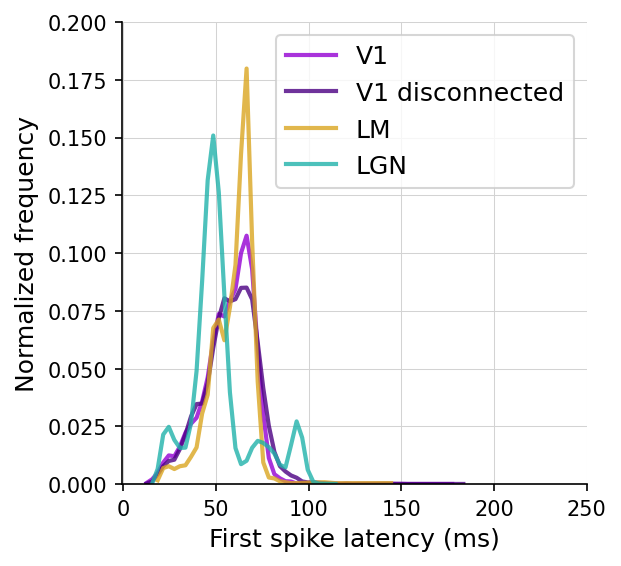

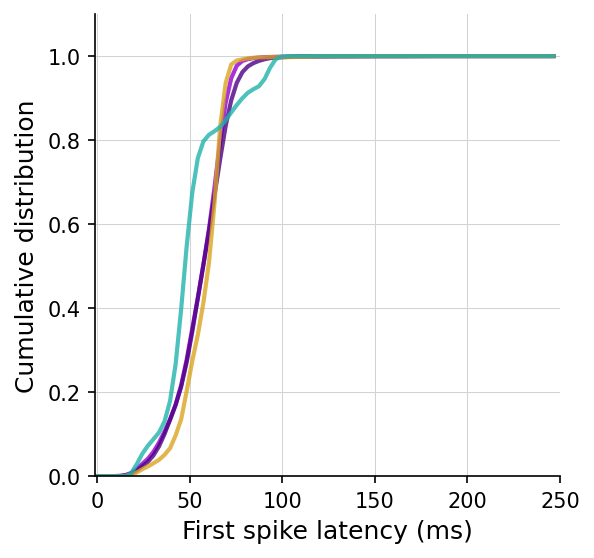

In [35]:
# make a histogram for each region 
# Define bin edges and centers
bin_edges = np.arange(-1, 250, 3)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate histograms
hist_v1_connected, _ = np.histogram(v1_medians, bins=bin_edges)
hist_v1_disconnected, _ = np.histogram(v1_dis_medians, bins=bin_edges)
hist_lm_connected, _ = np.histogram(lm_medians, bins=bin_edges)
hist_lgn_connected, _ = np.histogram(lgn_medians, bins=bin_edges)

# Normalize histograms
hist_v1_connected = hist_v1_connected / np.sum(hist_v1_connected)
hist_v1_disconnected = hist_v1_disconnected / np.sum(hist_v1_disconnected)
hist_lm_connected = hist_lm_connected / np.sum(hist_lm_connected)
hist_lgn_connected = hist_lgn_connected / np.sum(hist_lgn_connected)

# Width of each bar
width = (bin_edges[1] - bin_edges[0]) / 4

# Create bar plots
plt.figure(figsize = (4,4), dpi = 150)
# plt.bar(bin_centers - width*1.5, hist_v1_connected, width=width, color='darkviolet', label='V1 Connected', alpha=0.3)
# plt.bar(bin_centers - width*0.5, hist_v1_disconnected, width=width, color='indigo', label='V1 Disconnected', alpha=0.6)
# plt.bar(bin_centers + width*0.5, hist_lm_connected, width=width, color='gold', label='LM Connected', alpha=0.6)
# plt.bar(bin_centers + width*1.5, hist_lgn_connected, width=width, color='green', label='LGN Connected', alpha=0.6)

# Create line plots for non-zero values
plt.plot(bin_centers[hist_v1_connected > 0], hist_v1_connected[hist_v1_connected > 0], color='darkviolet', alpha = 0.8, label = 'V1', linewidth=2)
plt.plot(bin_centers[hist_v1_disconnected > 0], hist_v1_disconnected[hist_v1_disconnected > 0], color='indigo', alpha = 0.8, label = 'V1 disconnected', linewidth=2)
plt.plot(bin_centers[hist_lm_connected > 0], hist_lm_connected[hist_lm_connected > 0], color='goldenrod', alpha = 0.8, label = 'LM', linewidth=2)
plt.plot(bin_centers[hist_lgn_connected > 0], hist_lgn_connected[hist_lgn_connected > 0], color='lightseagreen', alpha = 0.8, label = 'LGN', linewidth=2)

plt.xlabel(r'First spike latency (ms)', fontsize = 12)
plt.ylabel('Normalized frequency', fontsize = 12)
plt.xlim(-1, 250)
plt.ylim(0,0.2)
# Add a light grey grid
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
# Remove top and right axes
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.legend(fontsize = 12)
plt.show()

# plot the cummulative distribution function
# Define bin edges and centers
bin_edges = np.arange(-1, 250, 3)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate histograms
hist_v1_connected, _ = np.histogram(v1_medians, bins=bin_edges)
hist_v1_disconnected, _ = np.histogram(v1_dis_medians, bins=bin_edges)
hist_lm_connected, _ = np.histogram(lm_medians, bins=bin_edges)
hist_lgn_connected, _ = np.histogram(lgn_medians, bins=bin_edges)

# Normalize histograms
hist_v1_connected = hist_v1_connected / np.sum(hist_v1_connected)
hist_v1_disconnected = hist_v1_disconnected / np.sum(hist_v1_disconnected)
hist_lm_connected = hist_lm_connected / np.sum(hist_lm_connected)
hist_lgn_connected = hist_lgn_connected / np.sum(hist_lgn_connected)

# Calculate cumulative distributions
cdf_v1_connected = np.cumsum(hist_v1_connected)
cdf_v1_disconnected = np.cumsum(hist_v1_disconnected)
cdf_lm_connected = np.cumsum(hist_lm_connected)
cdf_lgn_connected = np.cumsum(hist_lgn_connected)

# Create line plots
plt.figure(figsize = (4,4), dpi = 150)
plt.plot(bin_centers, cdf_v1_connected, color='darkviolet', alpha = 0.8, label = 'V1', linewidth=2)
plt.plot(bin_centers, cdf_v1_disconnected, color='indigo', alpha = 0.8, label = 'V1 disconnected', linewidth=2)
plt.plot(bin_centers, cdf_lm_connected, color='goldenrod', alpha = 0.8, label = 'LM', linewidth=2)
plt.plot(bin_centers, cdf_lgn_connected, color='lightseagreen', alpha = 0.8, label = 'LGN', linewidth=2)

plt.xlabel(r'First spike latency (ms)', fontsize = 12)
plt.ylabel('Cumulative distribution', fontsize = 12)
plt.xlim(-1, 250)
plt.ylim(0,1.1)
# Add a light grey grid
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
# Remove top and right axes
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# plt.legend()
plt.show()

In [36]:
# Compute each regions median and mean and print them
median_v1_connected = np.nanmedian(v1_medians)
median_v1_disconnected = np.nanmedian(v1_dis_medians)
median_lm_connected = np.nanmedian(lm_medians)
median_lgn_connected = np.nanmedian(lgn_medians)

mean_v1_connected = np.nanmean(v1_medians)
mean_v1_disconnected = np.nanmean(v1_dis_medians)
mean_lm_connected = np.nanmean(lm_medians)
mean_lgn_connected = np.nanmean(lgn_medians)

print('V1 connected median:', median_v1_connected)
print('V1 disconnected median:', median_v1_disconnected)
print('LM connected median:', median_lm_connected)
print('LGN connected median:', median_lgn_connected)
print()
print('V1 connected mean:', mean_v1_connected)
print('V1 disconnected mean:', mean_v1_disconnected)
print('LM connected mean:', mean_lm_connected)
print('LGN connected mean:', mean_lgn_connected)

V1 connected median: 58.5
V1 disconnected median: 58.5
LM connected median: 61.0
LGN connected median: 48.5

V1 connected mean: 56.315242494226325
V1 disconnected mean: 57.42369014239375
LM connected mean: 58.487382987382986
LGN connected mean: 51.92496327990293


In [37]:
# estimate errors
def get_bootstrap_95ci(M, measure_of_central_tendency, N=1000):
    n = int(len(M)/2)
    est = np.zeros((N,))
    for i in range(N):
        boot = M[np.random.permutation(len(M))[:n]]
        est[i] = measure_of_central_tendency(boot)
        
    return np.percentile(est,97.5) - np.nanmean(est)

# Compute 95% confidence intervals
ci_v1_connected = abs(get_bootstrap_95ci(np.array(v1_medians), np.mean))
ci_v1_disconnected = abs(get_bootstrap_95ci(np.array(v1_dis_medians), np.mean))
ci_lm_connected = abs(get_bootstrap_95ci(np.array(lm_medians), np.mean))
ci_lgn_connected = abs(get_bootstrap_95ci(np.array(lgn_medians), np.mean))

print('V1 connected 95% CI:', ci_v1_connected)
print('V1 disconnected 95% CI:', ci_v1_disconnected)
print('LM connected 95% CI:', ci_lm_connected)
print('LGN connected 95% CI:', ci_lgn_connected)

# the returned value represents the half-width of the 95% confidence interval around the mean of the bootstrap estimates. 
# It gives an idea of the statistical uncertainty of the measure of central tendency.

V1 connected 95% CI: 0.17122185334873308
V1 disconnected 95% CI: 0.20509984605234166
LM connected 95% CI: 0.44552157980455576
LGN connected 95% CI: 0.2637693191978556


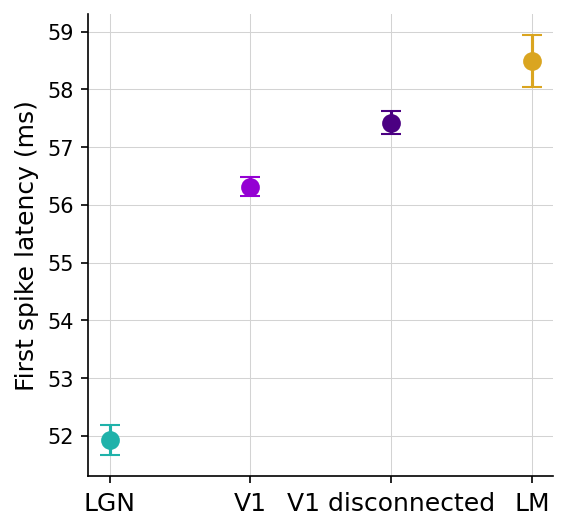

In [38]:
# Do a plot with the medians as points and the 95% confidence interval as error bars
# Create a figure
plt.figure(figsize=(4,4), dpi = 150)
x = ["LGN", "V1", "V1 disconnected", "LM"]
colors = ['lightseagreen', 'darkviolet', 'indigo', 'goldenrod']
#y = [median_lgn_connected, median_v1_connected, median_v1_disconnected, median_lm_connected]
y = [mean_lgn_connected, mean_v1_connected, mean_v1_disconnected, mean_lm_connected]
errors = [ci_lgn_connected, ci_v1_connected, ci_v1_disconnected, ci_lm_connected]

for i in range(len(x)):
    plt.errorbar(x[i], y[i], yerr=errors[i], fmt='o', capsize=5, markersize=8, color=colors[i])

plt.ylabel('First spike latency (ms)', fontsize = 12)

# Add a light grey grid
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
# Remove top and right axes
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xticks(fontsize = 12)

plt.show()



In [39]:
# obtain the significance of the means by doing welch tests
from scipy.stats import ttest_ind

# Welch's t-test
_, p_v1_v1dis = ttest_ind(v1_medians, v1_dis_medians, equal_var=False)
_, p_v1_lm = ttest_ind(v1_medians, lm_medians, equal_var=False)
_, p_v1_lgn = ttest_ind(v1_medians, lgn_medians, equal_var=False)
_, p_lm_lgn = ttest_ind(lm_medians, lgn_medians, equal_var=False)
_, p_lm_v1dis = ttest_ind(lm_medians, v1_dis_medians, equal_var=False)
_, p_lgn_v1dis = ttest_ind(lgn_medians, v1_dis_medians, equal_var=False)

print('V1 vs V1 disconnected:', p_v1_v1dis)
print('V1 vs LM:', p_v1_lm)
print('V1 vs LGN:', p_v1_lgn)
print('LM vs LGN:', p_lm_lgn)
print('LM vs V1 disconnected:', p_lm_v1dis)
print('LGN vs V1 disconnected:', p_lgn_v1dis)

V1 vs V1 disconnected: 8.811241536490378e-15
V1 vs LM: 2.182288645544867e-18
V1 vs LGN: 7.597802188154842e-151
LM vs LGN: 1.6189224351326851e-125
LM vs V1 disconnected: 2.5640767051453945e-05
LGN vs V1 disconnected: 1.274661864251926e-213


# 10. Layer filter

In [40]:
v1_medians = np.array(v1_medians)
lgn_medians = np.array(lgn_medians)
lm_medians = np.array(lm_medians)
v1_dis_medians = np.array(v1_dis_medians)

In [41]:
# apply the significant clean layer masks to the data
medians_v1_connected = [np.nanmedian(v1_medians[mask]) for mask in layer_mask_v1_clean_significant]

# V1
medians_v1_connected = [np.nanmedian(v1_medians[mask]) for mask in layer_mask_v1_clean_significant]
medians_v1_disconnected = [np.nanmedian(v1_dis_medians[mask]) for mask in layer_mask_v1_dis_clean_significant]
cis_v1_connected = [get_bootstrap_95ci(v1_medians[mask], np.nanmean) for mask in layer_mask_v1_clean_significant]
cis_v1_disconnected = [get_bootstrap_95ci(v1_dis_medians[mask], np.nanmean) for mask in layer_mask_v1_dis_clean_significant]

# LM
medians_lm_connected = [np.nanmedian(lm_medians[mask]) for mask in layer_mask_lm_clean_significant]
cis_lm_connected = [get_bootstrap_95ci(lm_medians[mask], np.nanmean) for mask in layer_mask_lm_clean_significant]

# LGN
medians_lgn_connected = [np.nanmedian(lgn_medians) for mask in layer_mask_lm_clean_significant]
cis_lgn_connected = [get_bootstrap_95ci(lgn_medians, np.nanmean) for mask in layer_mask_lm_clean_significant]

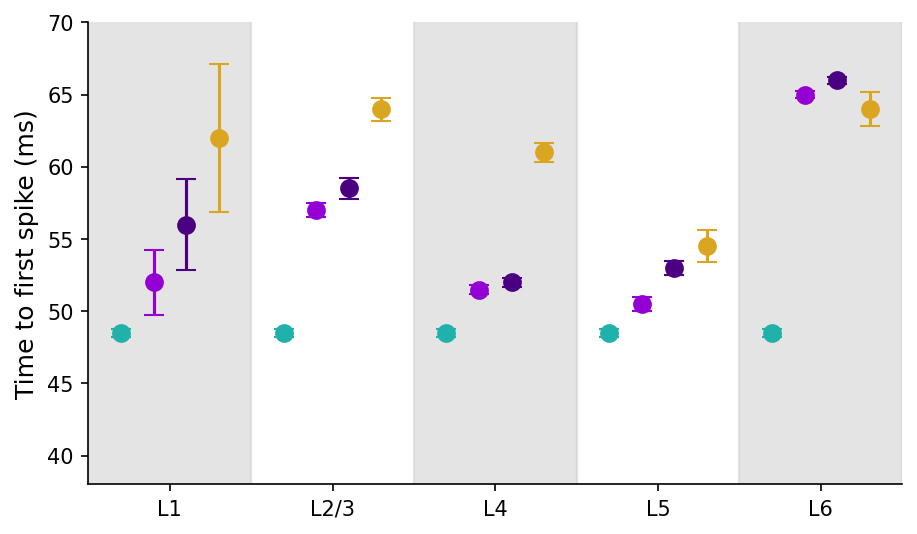

In [42]:
# Create a figure
# Assuming the layers are defined in a list called 'layers'
layers = ["L1", "L2/3", "L4", "L5", "L6"]

# Assuming the medians and confidence intervals are stored in lists
medians = [medians_lgn_connected, medians_v1_connected, medians_v1_disconnected, medians_lm_connected]
cis = [cis_lgn_connected, cis_v1_connected, cis_v1_disconnected, cis_lm_connected]

# Define the colors for each point
colors = ['lightseagreen', 'darkviolet', 'indigo', 'goldenrod']

# Create a figure
plt.figure(figsize=(7,4), dpi=150)

# Define the displacement for each point
displacements = [-0.3,-0.1, 0.1, 0.3 ]

# For each layer, plot the four points with their confidence intervals
for i, layer in enumerate(layers):
    for j in range(len(medians)):
        # Subtract the displacement for the first two points, add it for the last two
        offset = displacements[j]
        plt.errorbar(i + offset, medians[j][i], yerr=cis[j][i], fmt='o', capsize=5, markersize=8, color=colors[j])

        if i % 2 == 0:
            plt.fill_between([i+displacements[0]-0.2, i + displacements[3]+0.2], 0, 115, color="lightgrey", alpha=0.2)

# Set the x-ticks to the layers
plt.xticks(range(len(layers)), layers)

# Add a light grey grid
# plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Remove top and right axes
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlim(-0.5, 4.5)
plt.ylim(38, 70)

plt.ylabel('Time to first spike (ms)', fontsize = 12)

# Show the plot
plt.show()


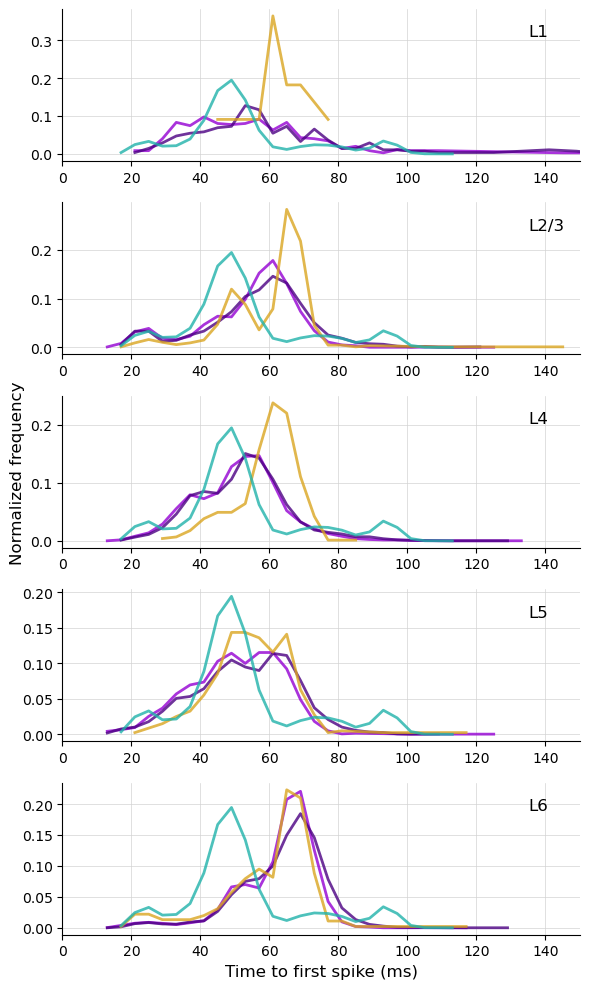

In [43]:
# plot the distributions for each layer
# Define bin edges and centers
bin_edges = np.arange(-1, 250, 4)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate histograms
hist_v1_connected = [np.histogram(v1_medians[mask], bins=bin_edges)[0] for mask in layer_mask_v1_clean_significant]
hist_v1_disconnected = [np.histogram(v1_dis_medians[mask], bins=bin_edges)[0] for mask in layer_mask_v1_dis_clean_significant]
hist_lm_connected = [np.histogram(lm_medians[mask], bins=bin_edges)[0] for mask in layer_mask_lm_clean_significant]
# lgn has no layers
hist_lgn_connected = [np.histogram(lgn_medians, bins=bin_edges)[0] for mask in layer_mask_lm]

# Normalize histograms
hist_v1_connected = [hist / np.sum(hist) for hist in hist_v1_connected]
hist_v1_disconnected = [hist / np.sum(hist) for hist in hist_v1_disconnected]
hist_lm_connected = [hist / np.sum(hist) for hist in hist_lm_connected]
hist_lgn_connected = [hist / np.sum(hist) for hist in hist_lgn_connected]

# Width of each bar
width = (bin_edges[1] - bin_edges[0]) / 4

# Create bar plots
# Create a figure and an array of subplots with shared x and y axes
fig, axs = plt.subplots(len(layers), 1, figsize=(6, 10), sharex=True)

# For each layer, plot the histograms
for i, ax in enumerate(axs):
    # # add bar plots
    # ax.bar(bin_centers - width*1.5, hist_v1_connected[i], width=width, color='darkviolet', label='V1 Connected', alpha=0.3)
    # ax.bar(bin_centers - width*0.5, hist_v1_disconnected[i], width=width, color='indigo', label='V1 Disconnected', alpha=0.6)
    # ax.bar(bin_centers + width*0.5, hist_lm_connected[i], width=width, color='gold', label='LM Connected', alpha=0.6)
    # ax.bar(bin_centers + width*1.5, hist_lgn_connected[i], width=width, color='lightseagreen', label='LGN Connected', alpha=0.6)


    # Plot the histograms for this layer
    ax.plot(bin_centers[hist_v1_connected[i] > 0], hist_v1_connected[i][hist_v1_connected[i] > 0], color='darkviolet', alpha = 0.8, label = 'V1', linewidth=2)
    ax.plot(bin_centers[hist_v1_disconnected[i] > 0], hist_v1_disconnected[i][hist_v1_disconnected[i] > 0], color='indigo', alpha = 0.8, label = 'V1 disconnected', linewidth=2)
    ax.plot(bin_centers[hist_lm_connected[i] > 0], hist_lm_connected[i][hist_lm_connected[i] > 0], color='goldenrod', alpha = 0.8, label = 'LM', linewidth=2)
    ax.plot(bin_centers[hist_lgn_connected[i] > 0], hist_lgn_connected[i][hist_lgn_connected[i] > 0], color='lightseagreen', alpha = 0.8, label = 'LGN', linewidth=2)

    # Set the y label
    if i == 2:
        ax.set_ylabel('Normalized frequency', fontsize = 12)

    # Add a light grey grid
    ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)

    # Remove top and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # add a text box with the layer
    ax.text(0.9, 0.9, layers[i], transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Set the x label for the last subplot
axs[-1].set_xlabel(r'Time to first spike (ms)', fontsize = 12)

# Adjust the layout to prevent overlap between subplots
plt.tight_layout()
plt.xlim(0,150)

# Show the plot
plt.show()

In [44]:
# compute significance with welch test for each layer

# Welch's t-test
p_values_v1_lgn = []
for i in range(len(layers)):
    _, p = ttest_ind(v1_medians[layer_mask_v1_clean_significant[i]], lgn_medians, equal_var=False)
    p_values_v1_lgn.append(p)

print(p_values_v1_lgn)

p_values_v1_lm = []
for i in range(len(layers)):
    _, p = ttest_ind(v1_medians[layer_mask_v1_clean_significant[i]], lm_medians, equal_var=False)
    p_values_v1_lm.append(p)

print(p_values_v1_lm)

p_values_v1_v1dis = []

for i in range(len(layers)):
    _, p = ttest_ind(v1_medians[layer_mask_v1_clean_significant[i]], v1_dis_medians, equal_var=False)
    p_values_v1_v1dis.append(p)

print(p_values_v1_v1dis) 

[0.008586878825276084, 1.6799630440738334e-11, 1.4421912959042338e-07, 2.6493010536017205e-14, 0.0]
[0.0021540580308369453, 6.097293292249769e-40, 7.72680619132948e-148, 1.4542564415500552e-143, 1.5843860506981976e-41]
[0.028479896065672364, 6.670480349259507e-36, 5.2397545532067394e-213, 9.19811919378148e-171, 1.978655063632689e-181]


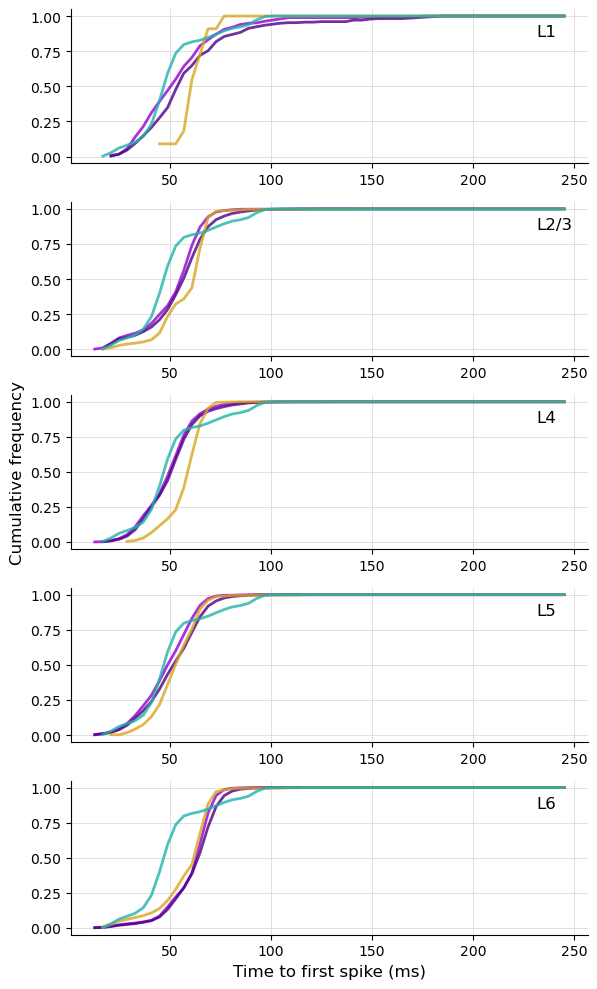

In [45]:
# Calculate cumulative histograms
cum_hist_v1_connected = [np.cumsum(hist) for hist in hist_v1_connected]
cum_hist_v1_disconnected = [np.cumsum(hist) for hist in hist_v1_disconnected]
cum_hist_lm_connected = [np.cumsum(hist) for hist in hist_lm_connected]
cum_hist_lgn_connected = [np.cumsum(hist) for hist in hist_lgn_connected]

# Create a figure and an array of subplots with shared x and y axes
fig, axs = plt.subplots(len(layers), 1, figsize=(6, 10), sharex=True)

# For each layer, plot the cumulative histograms
for i, ax in enumerate(axs):
    # Plot the cumulative histograms for this layer
    ax.plot(bin_centers[cum_hist_v1_connected[i] > 0], cum_hist_v1_connected[i][cum_hist_v1_connected[i] > 0], color='darkviolet', alpha = 0.8, label = 'V1', linewidth=2)
    ax.plot(bin_centers[cum_hist_v1_disconnected[i] > 0], cum_hist_v1_disconnected[i][cum_hist_v1_disconnected[i] > 0], color='indigo', alpha = 0.8, label = 'V1 disconnected', linewidth=2)
    ax.plot(bin_centers[cum_hist_lm_connected[i] > 0], cum_hist_lm_connected[i][cum_hist_lm_connected[i] > 0], color='goldenrod', alpha = 0.8, label = 'LM', linewidth=2)
    ax.plot(bin_centers[cum_hist_lgn_connected[i] > 0], cum_hist_lgn_connected[i][cum_hist_lgn_connected[i] > 0], color='lightseagreen', alpha = 0.8, label = 'LGN', linewidth=2)

    # Set the y label
    if i == 2:
        ax.set_ylabel('Cumulative frequency', fontsize = 12)

    # Add a light grey grid
    ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)

    # Remove top and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # add a text box with the layer
    ax.text(0.9, 0.9, layers[i], transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Set the x label for the last subplot
axs[-1].set_xlabel(r'Time to first spike (ms)', fontsize = 12)

# Adjust the layout to prevent overlap between subplots
plt.tight_layout()

# Show the plot
plt.show()

# 11. Change from baseline firing rate

## White

In [6]:
v1 = v1_white
lm = lm_white
lgn = lgn_white
v1_dis = v1_white_disconnected

In [7]:
# Filters for selecting only the excitatory neurons and having them classified in layers
# networks['v1'].keys() to visualize the keys of the dictionary

# obtain the neuron type of each neuron 
new_pop_names = other_billeh_utils.pop_names(networks['v1'], n_selected_neurons=51978, data_dir='/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/GLIF_network')
cell_types_v1 = [other_billeh_utils.pop_name_to_cell_type(pop_name) for pop_name in new_pop_names]

new_pop_names = other_billeh_utils.pop_names(networks['lm'], n_selected_neurons=7414, data_dir='/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/GLIF_network')
cell_types_lm = [other_billeh_utils.pop_name_to_cell_type(pop_name) for pop_name in new_pop_names]

cell_types = [cell_types_v1, cell_types_lm]

unique_cell_types = list(set(cell_types_v1))
unique_cell_types = sorted(unique_cell_types)

# Do a mask for exc. + inh. for each layer of each region
layer_mask_v1 = [[cell_type.startswith(f'L{i}') for cell_type in cell_types[0]] for i in ["1","2/3","4","5","6"]]
layer_mask_lm = [[cell_type.startswith(f'L{i}') for cell_type in cell_types[1]] for i in ["1","2/3","4","5","6"]]

# Do a mask for neuron types in each layer of each region 
# The unique neuron types are stored in unique_cell_types
layer_mask_v1_types = [[cell_type == unique_cell_types[i] for cell_type in cell_types[0]] for i in range(len(unique_cell_types))]
layer_mask_lm_types = [[cell_type == unique_cell_types[i] for cell_type in cell_types[1]] for i in range(len(unique_cell_types))]


In [54]:
# Compute the average baseline firing rate
ti = 0
tf = 1 # s, prestimulus region

dt = 0.001 # s, time step
T = 1/dt # Hz, sampling frequency

# Compute the firing rate of every region in every trial and then average over trials and neurons so I obtain a value for each region
# the structure of v1 is v1[trial, time, neuron]
# now LGN
# create a fake mask for LGN as if all neurons were from same class and layer
layer_mask_lgn_types = [[True for neuron in range(len(lgn_white[0,0]))]]
baseline_rate_lgn = []
for k, mask in enumerate(layer_mask_lgn_types):
    spiking_rates_per_type = []
    fr_trials = np.zeros(100)

    for i, trial in enumerate(lgn): # Added enumerate
        fr_neurons = np.zeros(len(trial.T[mask]))

        for j, neuron in enumerate(trial.T[mask]): # Added enumerate
            spikes = np.sum(neuron[int(ti*T):int(tf*T)])
            fr = spikes / (tf - ti) # average firing rate of one neuron in one trial
            fr_neurons[j] = fr # Use j as index

        fr_trials[i] = np.mean(fr_neurons) # Use i as index

    # Compute the average firing rate of LGN
    fr_lgn = np.mean(fr_trials)

    baseline_rate_lgn.append(fr_lgn)

    # print((k+1)/len(layer_mask_lgn_types)*100, "% done")

# save the data
with open('baseline_rate_lgn_types.pkl', 'wb') as f:
    pkl.dump(baseline_rate_lgn, f)

# print the results
for i, rate in enumerate(baseline_rate_lgn):
    print(f"Average firing rate of LGN {unique_cell_types[i]}: {rate:.2f} Hz")


# Compute the baseline rate for each neuron type and layer
baseline_rate_v1_types = []
for k, mask in enumerate(layer_mask_v1_types):
    spiking_rates_per_type = []
    fr_trials = np.zeros(100)

    for i, trial in enumerate(v1): # Added enumerate
        fr_neurons = np.zeros(len(trial.T[mask]))

        for j, neuron in enumerate(trial.T[mask]): # Added enumerate
            spikes = np.sum(neuron[int(ti*T):int(tf*T)])
            fr = spikes / (tf - ti) # average firing rate of one neuron in one trial
            fr_neurons[j] = fr # Use j as index

        fr_trials[i] = np.mean(fr_neurons) # Use i as index

    # Compute the average firing rate of V1
    fr_v1 = np.mean(fr_trials)

    baseline_rate_v1_types.append(fr_v1)

    # print((k+1)/len(layer_mask_v1_types)*100, "% done")

# save the file
with open('baseline_rate_v1_types.pkl', 'wb') as f:
    pkl.dump(baseline_rate_v1_types, f)

# print the results
for i, rate in enumerate(baseline_rate_v1_types):
    print(f"Average firing rate of V1 {unique_cell_types[i]}: {rate:.2f} Hz")

# Do the same for LM
baseline_rate_lm_types = []
for k, mask in enumerate(layer_mask_lm_types):
    spiking_rates_per_type = []
    fr_trials = np.zeros(100)

    for i, trial in enumerate(lm): # Added enumerate
        fr_neurons = np.zeros(len(trial.T[mask]))

        for j, neuron in enumerate(trial.T[mask]): # Added enumerate
            spikes = np.sum(neuron[int(ti*T):int(tf*T)])
            fr = spikes / (tf - ti) # average firing rate of one neuron in one trial
            fr_neurons[j] = fr # Use j as index

        fr_trials[i] = np.mean(fr_neurons) # Use i as index

    # Compute the average firing rate of LM
    fr_lm = np.mean(fr_trials)

    baseline_rate_lm_types.append(fr_lm)

    # print((k+1)/len(layer_mask_lm_types)*100, "% done")

# save the data
with open('baseline_rate_lm_types.pkl', 'wb') as f:
    pkl.dump(baseline_rate_lm_types, f)

# print the results
for i, rate in enumerate(baseline_rate_lm_types):
    print(f"Average firing rate of LM {unique_cell_types[i]}: {rate:.2f} Hz")

# Now for V1 dis
baseline_rate_v1_dis_types = []
for k, mask in enumerate(layer_mask_v1_types):
    spiking_rates_per_type = []
    fr_trials = np.zeros(100)

    for i, trial in enumerate(v1_dis): # Added enumerate
        fr_neurons = np.zeros(len(trial.T[mask]))

        for j, neuron in enumerate(trial.T[mask]): # Added enumerate
            spikes = np.sum(neuron[int(ti*T):int(tf*T)])
            fr = spikes / (tf - ti) # average firing rate of one neuron in one trial
            fr_neurons[j] = fr # Use j as index

        fr_trials[i] = np.mean(fr_neurons) # Use i as index

    # Compute the average firing rate of V1 disconnected
    fr_v1_dis = np.mean(fr_trials)

    baseline_rate_v1_dis_types.append(fr_v1_dis)

    # print((k+1)/len(layer_mask_v1_types)*100, "% done")

# save the data
with open('baseline_rate_v1_dis_types.pkl', 'wb') as f:
    pkl.dump(baseline_rate_v1_dis_types, f)

# print the results
for i, rate in enumerate(baseline_rate_v1_dis_types):
    print(f"Average firing rate of V1 disconnected {unique_cell_types[i]}: {rate:.2f} Hz")


Average firing rate of LGN L1 Htr3a: 3.83 Hz
Average firing rate of V1 L1 Htr3a: 3.98 Hz
Average firing rate of V1 L2/3 Exc: 1.02 Hz
Average firing rate of V1 L2/3 Htr3a: 10.22 Hz
Average firing rate of V1 L2/3 PV: 7.76 Hz
Average firing rate of V1 L2/3 SST: 4.65 Hz
Average firing rate of V1 L4 Exc: 3.27 Hz
Average firing rate of V1 L4 Htr3a: 2.34 Hz
Average firing rate of V1 L4 PV: 9.92 Hz
Average firing rate of V1 L4 SST: 3.34 Hz
Average firing rate of V1 L5 Exc: 5.68 Hz
Average firing rate of V1 L5 Htr3a: 9.54 Hz
Average firing rate of V1 L5 PV: 11.51 Hz
Average firing rate of V1 L5 SST: 6.66 Hz
Average firing rate of V1 L6 Exc: 2.93 Hz
Average firing rate of V1 L6 Htr3a: 4.58 Hz
Average firing rate of V1 L6 PV: 11.66 Hz
Average firing rate of V1 L6 SST: 10.99 Hz
Average firing rate of LM L1 Htr3a: 3.73 Hz
Average firing rate of LM L2/3 Exc: 1.31 Hz
Average firing rate of LM L2/3 Htr3a: 9.74 Hz
Average firing rate of LM L2/3 PV: 4.99 Hz
Average firing rate of LM L2/3 SST: 4.08 Hz
Av

In [55]:
# Load the data
with open('baseline_rate_v1_types.pkl', 'rb') as f:
    baseline_rate_v1_types = pkl.load(f)

with open('baseline_rate_lm_types.pkl', 'rb') as f:
    baseline_rate_lm_types = pkl.load(f)

with open('baseline_rate_v1_dis_types.pkl', 'rb') as f:
    baseline_rate_v1_dis_types = pkl.load(f)

with open('baseline_rate_lgn_types.pkl', 'rb') as f:
    baseline_rate_lgn_types = pkl.load(f)

In [59]:
# now compute the moving average firing rate of the network 

# select stimulus region
ti = 1 #s
tf = 1.250 #s

dt = 0.001
T = 1/dt

# Now for LGN
spiking_rates_stim_types = []
for k, mask in tqdm(enumerate(layer_mask_lgn_types)):
    fr_trials = np.zeros((100, int(tf*T-ti*T)))
    for i, trial in enumerate(lgn):
        # compute the amount of spikes per neuron and per second for each time step
        t = trial[int(ti*T):int(tf*T)]
        spikes_t = np.sum(t[:, mask], axis=1)/(len(t[0, mask])*dt) # spikes per second

        fr_trials[i, :] = spikes_t

    # compute over time the average in trials
    fr_avg_lgn = np.mean(fr_trials, axis=0)

    spiking_rates_stim_types.append(fr_avg_lgn)

    # print(f"Neuron type {k+1}: Average firing rate = {np.mean(fr_avg_lgn):.2f} Hz")
    # print((k+1)/len(layer_mask_lgn_types)*100, "% done")

# save spiking_rates_stim_types
with open('spiking_rates_stim_types_lgn.pkl', 'wb') as f:
    pkl.dump(spiking_rates_stim_types, f)

# iterate over trials
spiking_rates_stim_types = []
for k, mask in tqdm(enumerate(layer_mask_v1_types)):
    fr_trials = np.zeros((100, int(tf*T-ti*T)))
    for i, trial in enumerate(v1):
        # compute the amount of spikes per neuron and per second for each time step
        t = trial[int(ti*T):int(tf*T)]
        spikes_t = np.sum(t[:, mask], axis=1)/(len(t[0, mask])*dt) # spikes per second

        fr_trials[i, :] = spikes_t

    # compute over time the average in trials
    fr_avg_v1 = np.mean(fr_trials, axis=0)

    spiking_rates_stim_types.append(fr_avg_v1)

    # print(f"Neuron type {k+1}: Average firing rate = {np.mean(fr_avg_v1):.2f} Hz")
    # print((k+1)/len(layer_mask_v1_types)*100, "% done")

# save spiking_rates_stim_types
with open('spiking_rates_stim_types_v1.pkl', 'wb') as f:
    pkl.dump(spiking_rates_stim_types, f)

# Now for LM
# Now doing the same for LM
spiking_rates_stim_types = []
for k, mask in tqdm(enumerate(layer_mask_lm_types)):
    fr_trials = np.zeros((100, int(tf*T-ti*T)))
    for i, trial in enumerate(lm):
        # compute the amount of spikes per neuron and per second for each time step
        t = trial[int(ti*T):int(tf*T)]
        spikes_t = np.sum(t[:, mask], axis=1)/(len(t[0, mask])*dt) # spikes per second

        fr_trials[i, :] = spikes_t

    # compute over time the average in trials
    fr_avg_lm = np.mean(fr_trials, axis=0)

    spiking_rates_stim_types.append(fr_avg_lm)

    # print(f"Neuron type {k+1}: Average firing rate = {np.mean(fr_avg_lm):.2f} Hz")
    # print((k+1)/len(layer_mask_lm_types)*100, "% done")

# save spiking_rates_stim_types
with open('spiking_rates_stim_types_lm.pkl', 'wb') as f:
    pkl.dump(spiking_rates_stim_types, f)

# Now for V1 dis
spiking_rates_stim_types = []
for k, mask in tqdm(enumerate(layer_mask_v1_types)):
    fr_trials = np.zeros((100, int(tf*T-ti*T)))
    for i, trial in enumerate(v1_dis):
        # compute the amount of spikes per neuron and per second for each time step
        t = trial[int(ti*T):int(tf*T)]
        spikes_t = np.sum(t[:, mask], axis=1)/(len(t[0, mask])*dt) # spikes per second

        fr_trials[i, :] = spikes_t

    # compute over time the average in trials
    fr_avg_v1_dis = np.mean(fr_trials, axis=0)

    spiking_rates_stim_types.append(fr_avg_v1_dis)

    # print(f"Neuron type {k+1}: Average firing rate = {np.mean(fr_avg_v1_dis):.2f} Hz")
    # print((k+1)/len(layer_mask_v1_types)*100, "% done")

# save spiking_rates_stim_types
with open('spiking_rates_stim_types_v1_dis.pkl', 'wb') as f:
    pkl.dump(spiking_rates_stim_types, f)

0it [00:00, ?it/s]

1it [00:01,  1.50s/it]
17it [00:12,  1.35it/s]
17it [00:02,  6.59it/s]
17it [00:12,  1.41it/s]


In [60]:
# load the data
with open('spiking_rates_stim_types_v1.pkl', 'rb') as f:
    spiking_rates_stim_types_v1 = pkl.load(f)

with open('spiking_rates_stim_types_lm.pkl', 'rb') as f:
    spiking_rates_stim_types_lm = pkl.load(f)

with open('spiking_rates_stim_types_v1_dis.pkl', 'rb') as f:
    spiking_rates_stim_types_v1_dis = pkl.load(f)

with open('spiking_rates_stim_types_lgn.pkl', 'rb') as f:
    spiking_rates_stim_types_lgn = pkl.load(f)

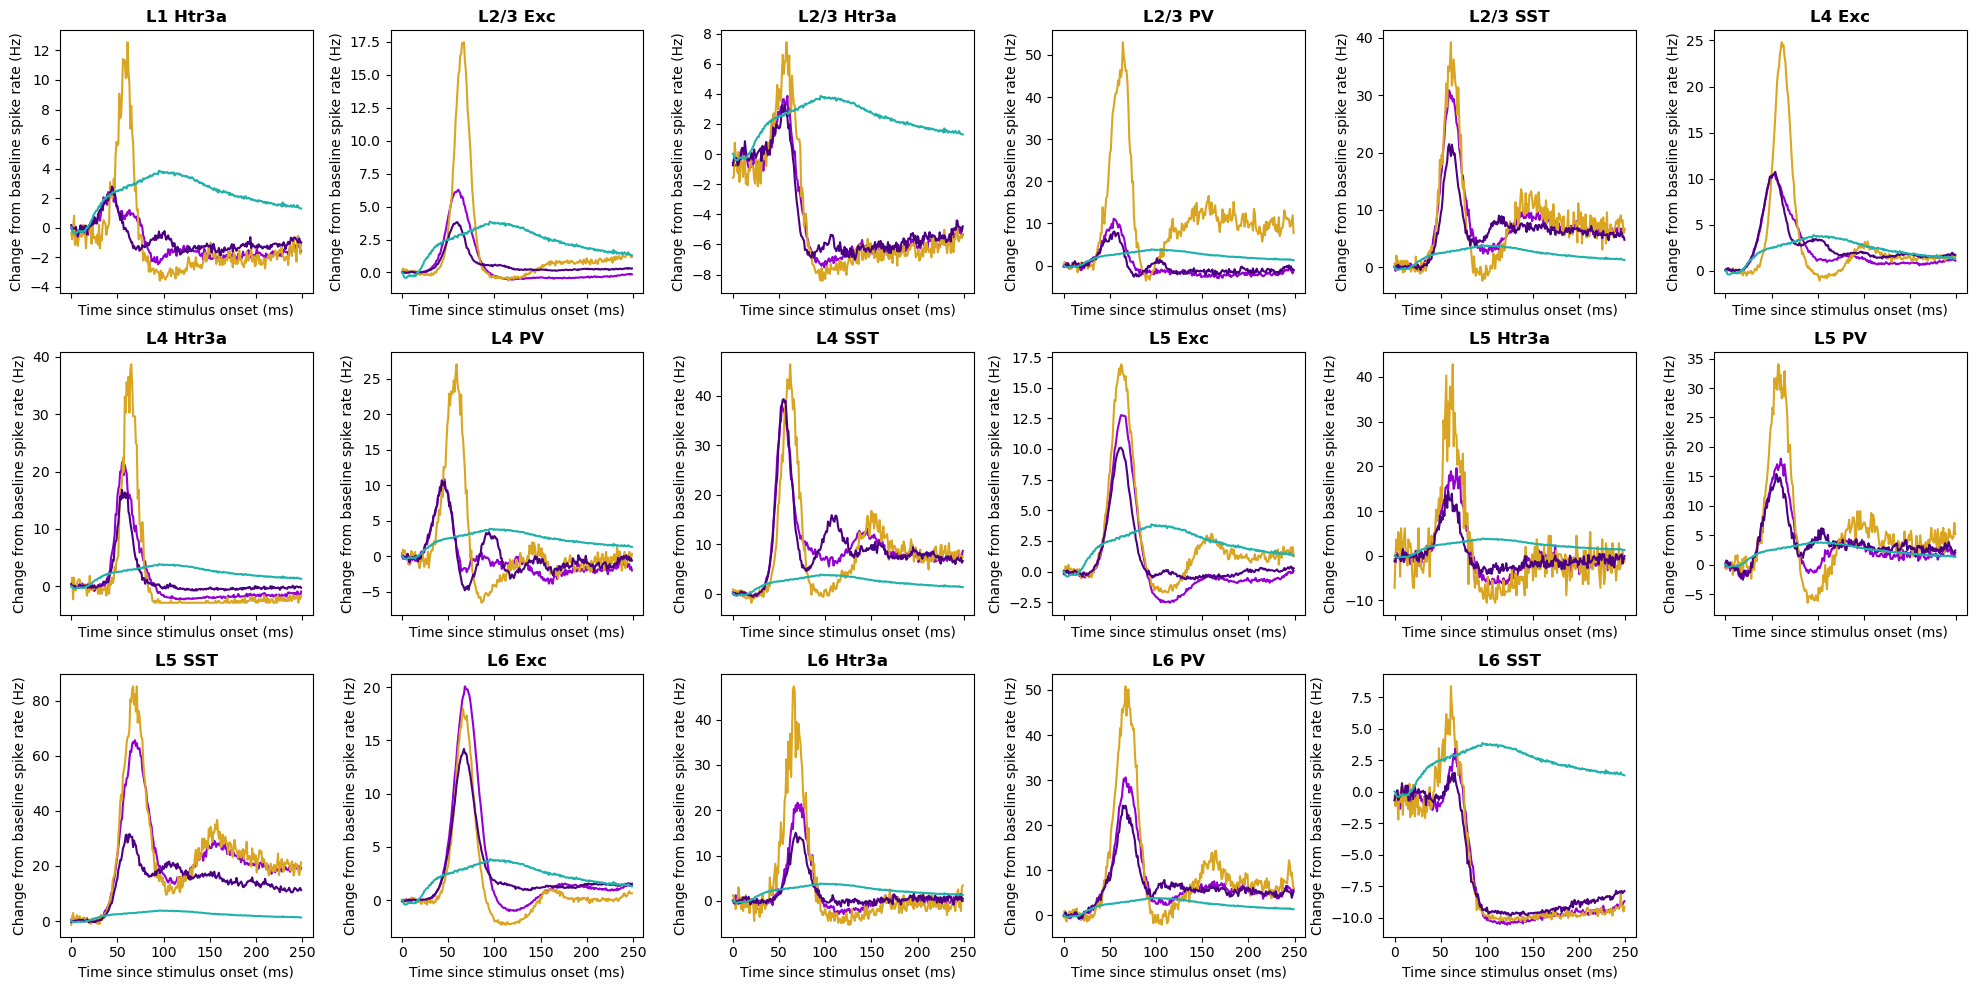

In [62]:
# compute the differences
diff_v1_types = [(np.array(spiking_rates_stim_types_v1[i])- baseline_rate_v1_types[i]) for i in range(len(unique_cell_types))]
diff_lm_types = [(np.array(spiking_rates_stim_types_lm[i])- baseline_rate_lm_types[i]) for i in range(len(unique_cell_types))]
diff_v1_dis_types = [(np.array(spiking_rates_stim_types_v1_dis[i])- baseline_rate_v1_dis_types[i]) for i in range(len(unique_cell_types))]
diff_lgn_types = (np.array(spiking_rates_stim_types_lgn[0])- baseline_rate_lgn_types[0])

colors = ['darkviolet', 'indigo', 'goldenrod', 'lightseagreen']

# plot against time using different unique colors for each neuron type 
# do a 17 different plots using subplots 
fig, axs = plt.subplots(3, 6, figsize=(20,10), sharex=True)
for i, ax in enumerate(axs.flat):
    if i < len(unique_cell_types):
        ax.plot(diff_v1_types[i], label="V1", color = colors[0])
        ax.plot(diff_lm_types[i], label="LM", color = colors[2])
        ax.plot(diff_v1_dis_types[i], label="V1 disconnected", color = colors[1])
        ax.plot(diff_lgn_types, label="LGN", color = colors[3])
        ax.set_title(f'{unique_cell_types[i]}', weight = 'bold')
        ax.set_xlabel('Time since stimulus onset (ms)')
        ax.set_ylabel('Change from baseline spike rate (Hz)')
        # set the legend
        # ax.legend()
        # # print the first element of the array
        # print(f"Neuron type {i+1}:")
        # print(f"V1: {diff_v1_types[i][0]:.2f} Hz")
        # print(f"LM: {diff_lm_types[i][0]:.2f} Hz")
    else:
        ax.axis('off')  # Hide unused subplots
plt.tight_layout()

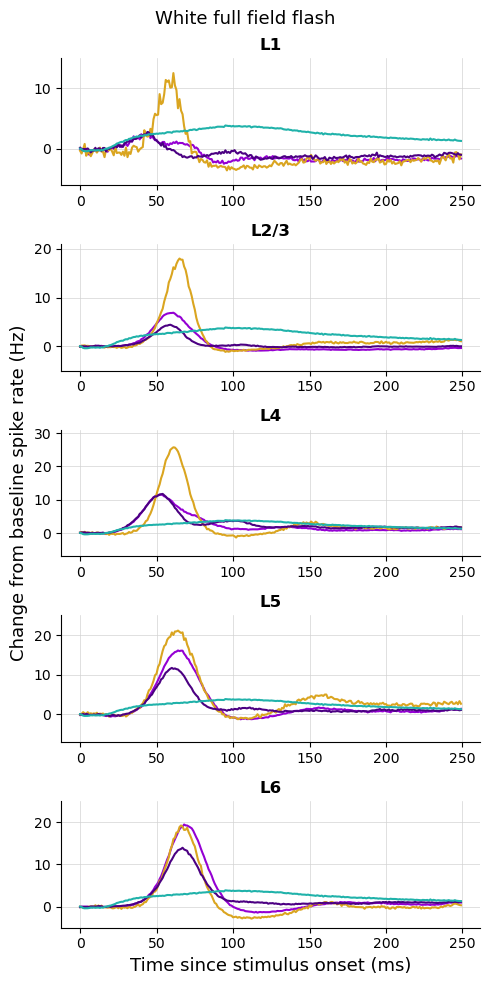

In [64]:
# To do it by layers sum all the data in the types in the same layer weighted with the number of neurons of each type
diff_v1_layers = []
diff_lm_layers = []
diff_v1_dis_layers = []

# number of neurons of each type
n_neurons_v1 = [np.sum(mask) for mask in layer_mask_v1_types]
n_neurons_lm = [np.sum(mask) for mask in layer_mask_lm_types]

# convert data to arrays
diff_v1_types = np.array(diff_v1_types)
diff_lm_types = np.array(diff_lm_types)
diff_v1_dis_types = np.array(diff_v1_dis_types)

# layer 1
diff_v1_layers.append(diff_v1_types[0])
diff_lm_layers.append(diff_lm_types[0])
diff_v1_dis_layers.append(diff_v1_dis_types[0])

# layer 2/3
n_layer23 = n_neurons_v1[1] + n_neurons_v1[2] + n_neurons_v1[3] + n_neurons_v1[4]
element = (diff_v1_types[1]*n_neurons_v1[1] + diff_v1_types[2]*n_neurons_v1[2] + diff_v1_types[3]*n_neurons_v1[3] + diff_v1_types[4]*n_neurons_v1[4])/n_layer23
diff_v1_layers.append(element)

n_layer23 = n_neurons_lm[1] + n_neurons_lm[2] + n_neurons_lm[3] + n_neurons_lm[4]
element = (diff_lm_types[1]*n_neurons_lm[1] + diff_lm_types[2]*n_neurons_lm[2] + diff_lm_types[3]*n_neurons_lm[3] + diff_lm_types[4]*n_neurons_lm[4])/n_layer23
diff_lm_layers.append(element)

n_layer23 = n_neurons_v1[1] + n_neurons_v1[2] + n_neurons_v1[3] + n_neurons_v1[4]
element = (diff_v1_dis_types[1]*n_neurons_v1[1] + diff_v1_dis_types[2]*n_neurons_v1[2] + diff_v1_dis_types[3]*n_neurons_v1[3] + diff_v1_dis_types[4]*n_neurons_v1[4])/n_layer23
diff_v1_dis_layers.append(element)  

# layer 4
n_layer4 = n_neurons_v1[5] + n_neurons_v1[6] + n_neurons_v1[7] + n_neurons_v1[8]
element = (diff_v1_types[5]*n_neurons_v1[5] + diff_v1_types[6]*n_neurons_v1[6] + diff_v1_types[7]*n_neurons_v1[7] + diff_v1_types[8]*n_neurons_v1[8])/n_layer4
diff_v1_layers.append(element)

n_layer4 = n_neurons_lm[5] + n_neurons_lm[6] + n_neurons_lm[7] + n_neurons_lm[8]
element = (diff_lm_types[5]*n_neurons_lm[5] + diff_lm_types[6]*n_neurons_lm[6] + diff_lm_types[7]*n_neurons_lm[7] + diff_lm_types[8]*n_neurons_lm[8])/n_layer4
diff_lm_layers.append(element)

n_layer4 = n_neurons_v1[5] + n_neurons_v1[6] + n_neurons_v1[7] + n_neurons_v1[8]
element = (diff_v1_dis_types[5]*n_neurons_v1[5] + diff_v1_dis_types[6]*n_neurons_v1[6] + diff_v1_dis_types[7]*n_neurons_v1[7] + diff_v1_dis_types[8]*n_neurons_v1[8])/n_layer4
diff_v1_dis_layers.append(element)

# layer 5
n_layer5 = n_neurons_v1[9] + n_neurons_v1[10] + n_neurons_v1[11] + n_neurons_v1[12]
element = (diff_v1_types[9]*n_neurons_v1[9] + diff_v1_types[10]*n_neurons_v1[10] + diff_v1_types[11]*n_neurons_v1[11] + diff_v1_types[12]*n_neurons_v1[12])/n_layer5
diff_v1_layers.append(element)

n_layer5 = n_neurons_lm[9] + n_neurons_lm[10] + n_neurons_lm[11] + n_neurons_lm[12]
element = (diff_lm_types[9]*n_neurons_lm[9] + diff_lm_types[10]*n_neurons_lm[10] + diff_lm_types[11]*n_neurons_lm[11] + diff_lm_types[12]*n_neurons_lm[12])/n_layer5
diff_lm_layers.append(element)

n_layer5 = n_neurons_v1[9] + n_neurons_v1[10] + n_neurons_v1[11] + n_neurons_v1[12]
element = (diff_v1_dis_types[9]*n_neurons_v1[9] + diff_v1_dis_types[10]*n_neurons_v1[10] + diff_v1_dis_types[11]*n_neurons_v1[11] + diff_v1_dis_types[12]*n_neurons_v1[12])/n_layer5
diff_v1_dis_layers.append(element)

# layer 6
n_layer6 = n_neurons_v1[13] + n_neurons_v1[14] + n_neurons_v1[15] + n_neurons_v1[16]
element = (diff_v1_types[13]*n_neurons_v1[13] + diff_v1_types[14]*n_neurons_v1[14] + diff_v1_types[15]*n_neurons_v1[15] + diff_v1_types[16]*n_neurons_v1[16])/n_layer6
diff_v1_layers.append(element)

n_layer6 = n_neurons_lm[13] + n_neurons_lm[14] + n_neurons_lm[15] + n_neurons_lm[16]
element = (diff_lm_types[13]*n_neurons_lm[13] + diff_lm_types[14]*n_neurons_lm[14] + diff_lm_types[15]*n_neurons_lm[15] + diff_lm_types[16]*n_neurons_lm[16])/n_layer6
diff_lm_layers.append(element)

n_layer6 = n_neurons_v1[13] + n_neurons_v1[14] + n_neurons_v1[15] + n_neurons_v1[16]
element = (diff_v1_dis_types[13]*n_neurons_v1[13] + diff_v1_dis_types[14]*n_neurons_v1[14] + diff_v1_dis_types[15]*n_neurons_v1[15] + diff_v1_dis_types[16]*n_neurons_v1[16])/n_layer6
diff_v1_dis_layers.append(element)

# plot against time using different unique colors for each neuron type
# do a 5 different plots using subplots
fig, axs = plt.subplots(5, 1, figsize=(5,10), sharex=True)
layers = ["L1", "L2/3", "L4", "L5", "L6"]

ylim_list = [(-6, 15), (-5, 21), (-7, 31), (-7, 25), (-5, 25)]   # Define your y-limits here

for i, ax in enumerate(axs.flat):
    if i < len(layers):
        ax.plot(diff_v1_layers[i], label="V1", color = colors[0])
        ax.plot(diff_lm_layers[i], label="LM", color = colors[2])
        ax.plot(diff_v1_dis_layers[i], label="V1 disconnected", color = colors[1])
        ax.plot(diff_lgn_types, label="LGN", color = colors[3])
        ax.set_title(f'{layers[i]}', weight = 'bold')
        ax.set_ylim(ylim_list[i])  # Set y-limits here
        # Add a light grey grid
        ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)
        # Remove top and right axes
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        if i == 2:
            ax.set_ylabel('Change from baseline spike rate (Hz)', fontsize = 13)
    else:
        ax.axis('off')  # Hide unused subplots

# Set the x-label for the shared x-axis
axs[-1].set_xlabel('Time since stimulus onset (ms)', fontsize = 13)
fig.suptitle('White full field flash', fontsize = 13)
plt.tight_layout()

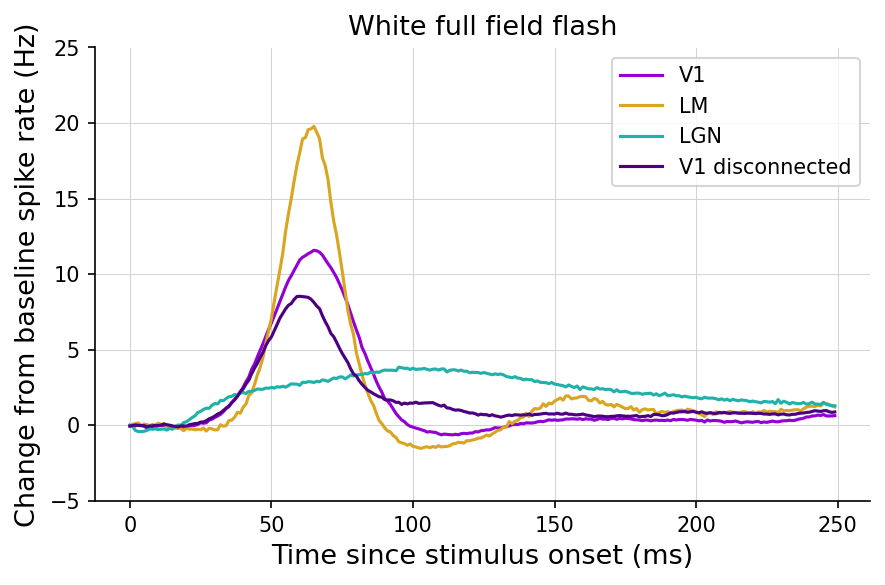

In [65]:
# Now recover the region-wise plot by summing all the data in the layers in the same region weighted with the number of neurons of each layer
n_neurons_layers_v1 = [np.sum(mask) for mask in layer_mask_v1]
n_neurons_layers_lm = [np.sum(mask) for mask in layer_mask_lm]

# convert to arrays
diff_v1_layers = np.array(diff_v1_layers)
diff_lm_layers = np.array(diff_lm_layers)
diff_v1_dis_layers = np.array(diff_v1_dis_layers)

# region v1
n_v1 = n_neurons_layers_v1[0] + n_neurons_layers_v1[1] + n_neurons_layers_v1[2] + n_neurons_layers_v1[3] + n_neurons_layers_v1[4]
element = (diff_v1_layers[0]*n_neurons_layers_v1[0] + diff_v1_layers[1]*n_neurons_layers_v1[1] + diff_v1_layers[2]*n_neurons_layers_v1[2] + diff_v1_layers[3]*n_neurons_layers_v1[3] + diff_v1_layers[4]*n_neurons_layers_v1[4])/n_v1
diff_v1_regions = element

# lm
n_lm = n_neurons_layers_lm[0] + n_neurons_layers_lm[1] + n_neurons_layers_lm[2] + n_neurons_layers_lm[3] + n_neurons_layers_lm[4]
element = (diff_lm_layers[0]*n_neurons_layers_lm[0] + diff_lm_layers[1]*n_neurons_layers_lm[1] + diff_lm_layers[2]*n_neurons_layers_lm[2] + diff_lm_layers[3]*n_neurons_layers_lm[3] + diff_lm_layers[4]*n_neurons_layers_lm[4])/n_lm
diff_lm_regions = element

# v1 dis
n_v1_dis = n_neurons_layers_v1[0] + n_neurons_layers_v1[1] + n_neurons_layers_v1[2] + n_neurons_layers_v1[3] + n_neurons_layers_v1[4]
element = (diff_v1_dis_layers[0]*n_neurons_layers_v1[0] + diff_v1_dis_layers[1]*n_neurons_layers_v1[1] + diff_v1_dis_layers[2]*n_neurons_layers_v1[2] + diff_v1_dis_layers[3]*n_neurons_layers_v1[3] + diff_v1_dis_layers[4]*n_neurons_layers_v1[4])/n_v1_dis
diff_v1_dis_regions = element

# plot against time
plt.figure(figsize=(6,4), dpi = 150)  
plt.plot(diff_v1_regions, label='V1', color='darkviolet')
plt.plot(diff_lm_regions, label='LM', color='goldenrod')
plt.plot(diff_lgn_types, label='LGN', color='lightseagreen')
plt.plot(diff_v1_dis_regions, label='V1 disconnected', color='indigo')
plt.xlabel('Time since stimulus onset (ms)', fontsize = 13)
plt.ylabel('Change from baseline spike rate (Hz)', fontsize = 13)
# Add a light grey grid
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
# Remove top and right axes
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.title("White full field flash", fontsize = 13)
plt.ylim((-5,25))
plt.legend()
plt.tight_layout()
plt.show()

## Black

In [66]:
v1 = v1_black
lm = lm_black
lgn = lgn_black
v1_dis = v1_black_disconnected

In [67]:
# Filters for selecting only the excitatory neurons and having them classified in layers
# networks['v1'].keys() to visualize the keys of the dictionary

# obtain the neuron type of each neuron 
new_pop_names = other_billeh_utils.pop_names(networks['v1'], n_selected_neurons=51978, data_dir='/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/GLIF_network')
cell_types_v1 = [other_billeh_utils.pop_name_to_cell_type(pop_name) for pop_name in new_pop_names]

new_pop_names = other_billeh_utils.pop_names(networks['lm'], n_selected_neurons=7414, data_dir='/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/GLIF_network')
cell_types_lm = [other_billeh_utils.pop_name_to_cell_type(pop_name) for pop_name in new_pop_names]

cell_types = [cell_types_v1, cell_types_lm]

unique_cell_types = list(set(cell_types_v1))
unique_cell_types = sorted(unique_cell_types)

# Do a mask for exc. + inh. for each layer of each region
layer_mask_v1 = [[cell_type.startswith(f'L{i}') for cell_type in cell_types[0]] for i in ["1","2/3","4","5","6"]]
layer_mask_lm = [[cell_type.startswith(f'L{i}') for cell_type in cell_types[1]] for i in ["1","2/3","4","5","6"]]

# Do a mask for neuron types in each layer of each region 
# The unique neuron types are stored in unique_cell_types
layer_mask_v1_types = [[cell_type == unique_cell_types[i] for cell_type in cell_types[0]] for i in range(len(unique_cell_types))]
layer_mask_lm_types = [[cell_type == unique_cell_types[i] for cell_type in cell_types[1]] for i in range(len(unique_cell_types))]

In [68]:
# Compute the average baseline firing rate
ti = 0
tf = 1 # s, prestimulus region

dt = 0.001 # s, time step
T = 1/dt # Hz, sampling frequency

# Compute the firing rate of every region in every trial and then average over trials and neurons so I obtain a value for each region
# the structure of v1 is v1[trial, time, neuron]
# now LGN
# create a fake mask for LGN as if all neurons were from same class and layer
layer_mask_lgn_types = [[True for neuron in range(len(lgn_white[0,0]))]]
baseline_rate_lgn = []
for k, mask in enumerate(layer_mask_lgn_types):
    spiking_rates_per_type = []
    fr_trials = np.zeros(100)

    for i, trial in enumerate(lgn): # Added enumerate
        fr_neurons = np.zeros(len(trial.T[mask]))

        for j, neuron in enumerate(trial.T[mask]): # Added enumerate
            spikes = np.sum(neuron[int(ti*T):int(tf*T)])
            fr = spikes / (tf - ti) # average firing rate of one neuron in one trial
            fr_neurons[j] = fr # Use j as index

        fr_trials[i] = np.mean(fr_neurons) # Use i as index

    # Compute the average firing rate of LGN
    fr_lgn = np.mean(fr_trials)

    baseline_rate_lgn.append(fr_lgn)

    # print((k+1)/len(layer_mask_lgn_types)*100, "% done")

# save the data
with open('baseline_rate_lgn_types_black.pkl', 'wb') as f:
    pkl.dump(baseline_rate_lgn, f)

# print the results
for i, rate in enumerate(baseline_rate_lgn):
    print(f"Average firing rate of LGN {unique_cell_types[i]}: {rate:.2f} Hz")


# Compute the baseline rate for each neuron type and layer
baseline_rate_v1_types = []
for k, mask in enumerate(layer_mask_v1_types):
    spiking_rates_per_type = []
    fr_trials = np.zeros(100)

    for i, trial in enumerate(v1): # Added enumerate
        fr_neurons = np.zeros(len(trial.T[mask]))

        for j, neuron in enumerate(trial.T[mask]): # Added enumerate
            spikes = np.sum(neuron[int(ti*T):int(tf*T)])
            fr = spikes / (tf - ti) # average firing rate of one neuron in one trial
            fr_neurons[j] = fr # Use j as index

        fr_trials[i] = np.mean(fr_neurons) # Use i as index

    # Compute the average firing rate of V1
    fr_v1 = np.mean(fr_trials)

    baseline_rate_v1_types.append(fr_v1)

    # print((k+1)/len(layer_mask_v1_types)*100, "% done")

# save the file
with open('baseline_rate_v1_types_black.pkl', 'wb') as f:
    pkl.dump(baseline_rate_v1_types, f)

# print the results
for i, rate in enumerate(baseline_rate_v1_types):
    print(f"Average firing rate of V1 {unique_cell_types[i]}: {rate:.2f} Hz")

# Do the same for LM
baseline_rate_lm_types = []
for k, mask in enumerate(layer_mask_lm_types):
    spiking_rates_per_type = []
    fr_trials = np.zeros(100)

    for i, trial in enumerate(lm): # Added enumerate
        fr_neurons = np.zeros(len(trial.T[mask]))

        for j, neuron in enumerate(trial.T[mask]): # Added enumerate
            spikes = np.sum(neuron[int(ti*T):int(tf*T)])
            fr = spikes / (tf - ti) # average firing rate of one neuron in one trial
            fr_neurons[j] = fr # Use j as index

        fr_trials[i] = np.mean(fr_neurons) # Use i as index

    # Compute the average firing rate of LM
    fr_lm = np.mean(fr_trials)

    baseline_rate_lm_types.append(fr_lm)

    # print((k+1)/len(layer_mask_lm_types)*100, "% done")

# save the data
with open('baseline_rate_lm_types_black.pkl', 'wb') as f:
    pkl.dump(baseline_rate_lm_types, f)

# print the results
for i, rate in enumerate(baseline_rate_lm_types):
    print(f"Average firing rate of LM {unique_cell_types[i]}: {rate:.2f} Hz")

# Now for V1 dis
baseline_rate_v1_dis_types = []
for k, mask in enumerate(layer_mask_v1_types):
    spiking_rates_per_type = []
    fr_trials = np.zeros(100)

    for i, trial in enumerate(v1_dis): # Added enumerate
        fr_neurons = np.zeros(len(trial.T[mask]))

        for j, neuron in enumerate(trial.T[mask]): # Added enumerate
            spikes = np.sum(neuron[int(ti*T):int(tf*T)])
            fr = spikes / (tf - ti) # average firing rate of one neuron in one trial
            fr_neurons[j] = fr # Use j as index

        fr_trials[i] = np.mean(fr_neurons) # Use i as index

    # Compute the average firing rate of V1 disconnected
    fr_v1_dis = np.mean(fr_trials)

    baseline_rate_v1_dis_types.append(fr_v1_dis)

    # print((k+1)/len(layer_mask_v1_types)*100, "% done")

# save the data
with open('baseline_rate_v1_dis_types_black.pkl', 'wb') as f:
    pkl.dump(baseline_rate_v1_dis_types, f)

# print the results
for i, rate in enumerate(baseline_rate_v1_dis_types):
    print(f"Average firing rate of V1 disconnected {unique_cell_types[i]}: {rate:.2f} Hz")


Average firing rate of LGN L1 Htr3a: 3.83 Hz
Average firing rate of V1 L1 Htr3a: 4.02 Hz
Average firing rate of V1 L2/3 Exc: 1.05 Hz
Average firing rate of V1 L2/3 Htr3a: 10.42 Hz
Average firing rate of V1 L2/3 PV: 7.89 Hz
Average firing rate of V1 L2/3 SST: 4.61 Hz
Average firing rate of V1 L4 Exc: 3.37 Hz
Average firing rate of V1 L4 Htr3a: 2.49 Hz
Average firing rate of V1 L4 PV: 10.07 Hz
Average firing rate of V1 L4 SST: 3.33 Hz
Average firing rate of V1 L5 Exc: 5.81 Hz
Average firing rate of V1 L5 Htr3a: 9.74 Hz
Average firing rate of V1 L5 PV: 11.60 Hz
Average firing rate of V1 L5 SST: 6.61 Hz
Average firing rate of V1 L6 Exc: 3.02 Hz
Average firing rate of V1 L6 Htr3a: 4.66 Hz
Average firing rate of V1 L6 PV: 11.74 Hz
Average firing rate of V1 L6 SST: 11.29 Hz
Average firing rate of LM L1 Htr3a: 3.80 Hz
Average firing rate of LM L2/3 Exc: 1.34 Hz
Average firing rate of LM L2/3 Htr3a: 9.90 Hz
Average firing rate of LM L2/3 PV: 5.07 Hz
Average firing rate of LM L2/3 SST: 4.09 Hz
A

In [69]:
# Load the data
with open('baseline_rate_v1_types_black.pkl', 'rb') as f:
    baseline_rate_v1_types = pkl.load(f)

with open('baseline_rate_lm_types_black.pkl', 'rb') as f:
    baseline_rate_lm_types = pkl.load(f)

with open('baseline_rate_v1_dis_types_black.pkl', 'rb') as f:
    baseline_rate_v1_dis_types = pkl.load(f)

with open('baseline_rate_lgn_types_black.pkl', 'rb') as f:
    baseline_rate_lgn_types = pkl.load(f)

In [70]:
# now compute the moving average firing rate of the network 

# select stimulus region
ti = 1 #s
tf = 1.250 #s

dt = 0.001
T = 1/dt

# Now for LGN
spiking_rates_stim_types = []
for k, mask in tqdm(enumerate(layer_mask_lgn_types)):
    fr_trials = np.zeros((100, int(tf*T-ti*T)))
    for i, trial in enumerate(lgn):
        # compute the amount of spikes per neuron and per second for each time step
        t = trial[int(ti*T):int(tf*T)]
        spikes_t = np.sum(t[:, mask], axis=1)/(len(t[0, mask])*dt) # spikes per second

        fr_trials[i, :] = spikes_t

    # compute over time the average in trials
    fr_avg_lgn = np.mean(fr_trials, axis=0)

    spiking_rates_stim_types.append(fr_avg_lgn)

    # print(f"Neuron type {k+1}: Average firing rate = {np.mean(fr_avg_lgn):.2f} Hz")
    # print((k+1)/len(layer_mask_lgn_types)*100, "% done")

# save spiking_rates_stim_types
with open('spiking_rates_stim_types_lgn_black.pkl', 'wb') as f:
    pkl.dump(spiking_rates_stim_types, f)

# iterate over trials
spiking_rates_stim_types = []
for k, mask in tqdm(enumerate(layer_mask_v1_types)):
    fr_trials = np.zeros((100, int(tf*T-ti*T)))
    for i, trial in enumerate(v1):
        # compute the amount of spikes per neuron and per second for each time step
        t = trial[int(ti*T):int(tf*T)]
        spikes_t = np.sum(t[:, mask], axis=1)/(len(t[0, mask])*dt) # spikes per second

        fr_trials[i, :] = spikes_t

    # compute over time the average in trials
    fr_avg_v1 = np.mean(fr_trials, axis=0)

    spiking_rates_stim_types.append(fr_avg_v1)

    # print(f"Neuron type {k+1}: Average firing rate = {np.mean(fr_avg_v1):.2f} Hz")
    # print((k+1)/len(layer_mask_v1_types)*100, "% done")

# save spiking_rates_stim_types
with open('spiking_rates_stim_types_v1_black.pkl', 'wb') as f:
    pkl.dump(spiking_rates_stim_types, f)

# Now for LM
# Now doing the same for LM
spiking_rates_stim_types = []
for k, mask in tqdm(enumerate(layer_mask_lm_types)):
    fr_trials = np.zeros((100, int(tf*T-ti*T)))
    for i, trial in enumerate(lm):
        # compute the amount of spikes per neuron and per second for each time step
        t = trial[int(ti*T):int(tf*T)]
        spikes_t = np.sum(t[:, mask], axis=1)/(len(t[0, mask])*dt) # spikes per second

        fr_trials[i, :] = spikes_t

    # compute over time the average in trials
    fr_avg_lm = np.mean(fr_trials, axis=0)

    spiking_rates_stim_types.append(fr_avg_lm)

    # print(f"Neuron type {k+1}: Average firing rate = {np.mean(fr_avg_lm):.2f} Hz")
    # print((k+1)/len(layer_mask_lm_types)*100, "% done")

# save spiking_rates_stim_types
with open('spiking_rates_stim_types_lm_black.pkl', 'wb') as f:
    pkl.dump(spiking_rates_stim_types, f)

# Now for V1 dis
spiking_rates_stim_types = []
for k, mask in tqdm(enumerate(layer_mask_v1_types)):
    fr_trials = np.zeros((100, int(tf*T-ti*T)))
    for i, trial in enumerate(v1_dis):
        # compute the amount of spikes per neuron and per second for each time step
        t = trial[int(ti*T):int(tf*T)]
        spikes_t = np.sum(t[:, mask], axis=1)/(len(t[0, mask])*dt) # spikes per second

        fr_trials[i, :] = spikes_t

    # compute over time the average in trials
    fr_avg_v1_dis = np.mean(fr_trials, axis=0)

    spiking_rates_stim_types.append(fr_avg_v1_dis)

    # print(f"Neuron type {k+1}: Average firing rate = {np.mean(fr_avg_v1_dis):.2f} Hz")
    # print((k+1)/len(layer_mask_v1_types)*100, "% done")

# save spiking_rates_stim_types
with open('spiking_rates_stim_types_v1_dis_black.pkl', 'wb') as f:
    pkl.dump(spiking_rates_stim_types, f)

1it [00:01,  1.12s/it]
17it [00:11,  1.43it/s]
17it [00:02,  8.44it/s]
17it [00:12,  1.39it/s]


In [71]:
# load the data
with open('spiking_rates_stim_types_v1_black.pkl', 'rb') as f:
    spiking_rates_stim_types_v1 = pkl.load(f)

with open('spiking_rates_stim_types_lm_black.pkl', 'rb') as f:
    spiking_rates_stim_types_lm = pkl.load(f)

with open('spiking_rates_stim_types_v1_dis_black.pkl', 'rb') as f:
    spiking_rates_stim_types_v1_dis = pkl.load(f)

with open('spiking_rates_stim_types_lgn_black.pkl', 'rb') as f:
    spiking_rates_stim_types_lgn = pkl.load(f)

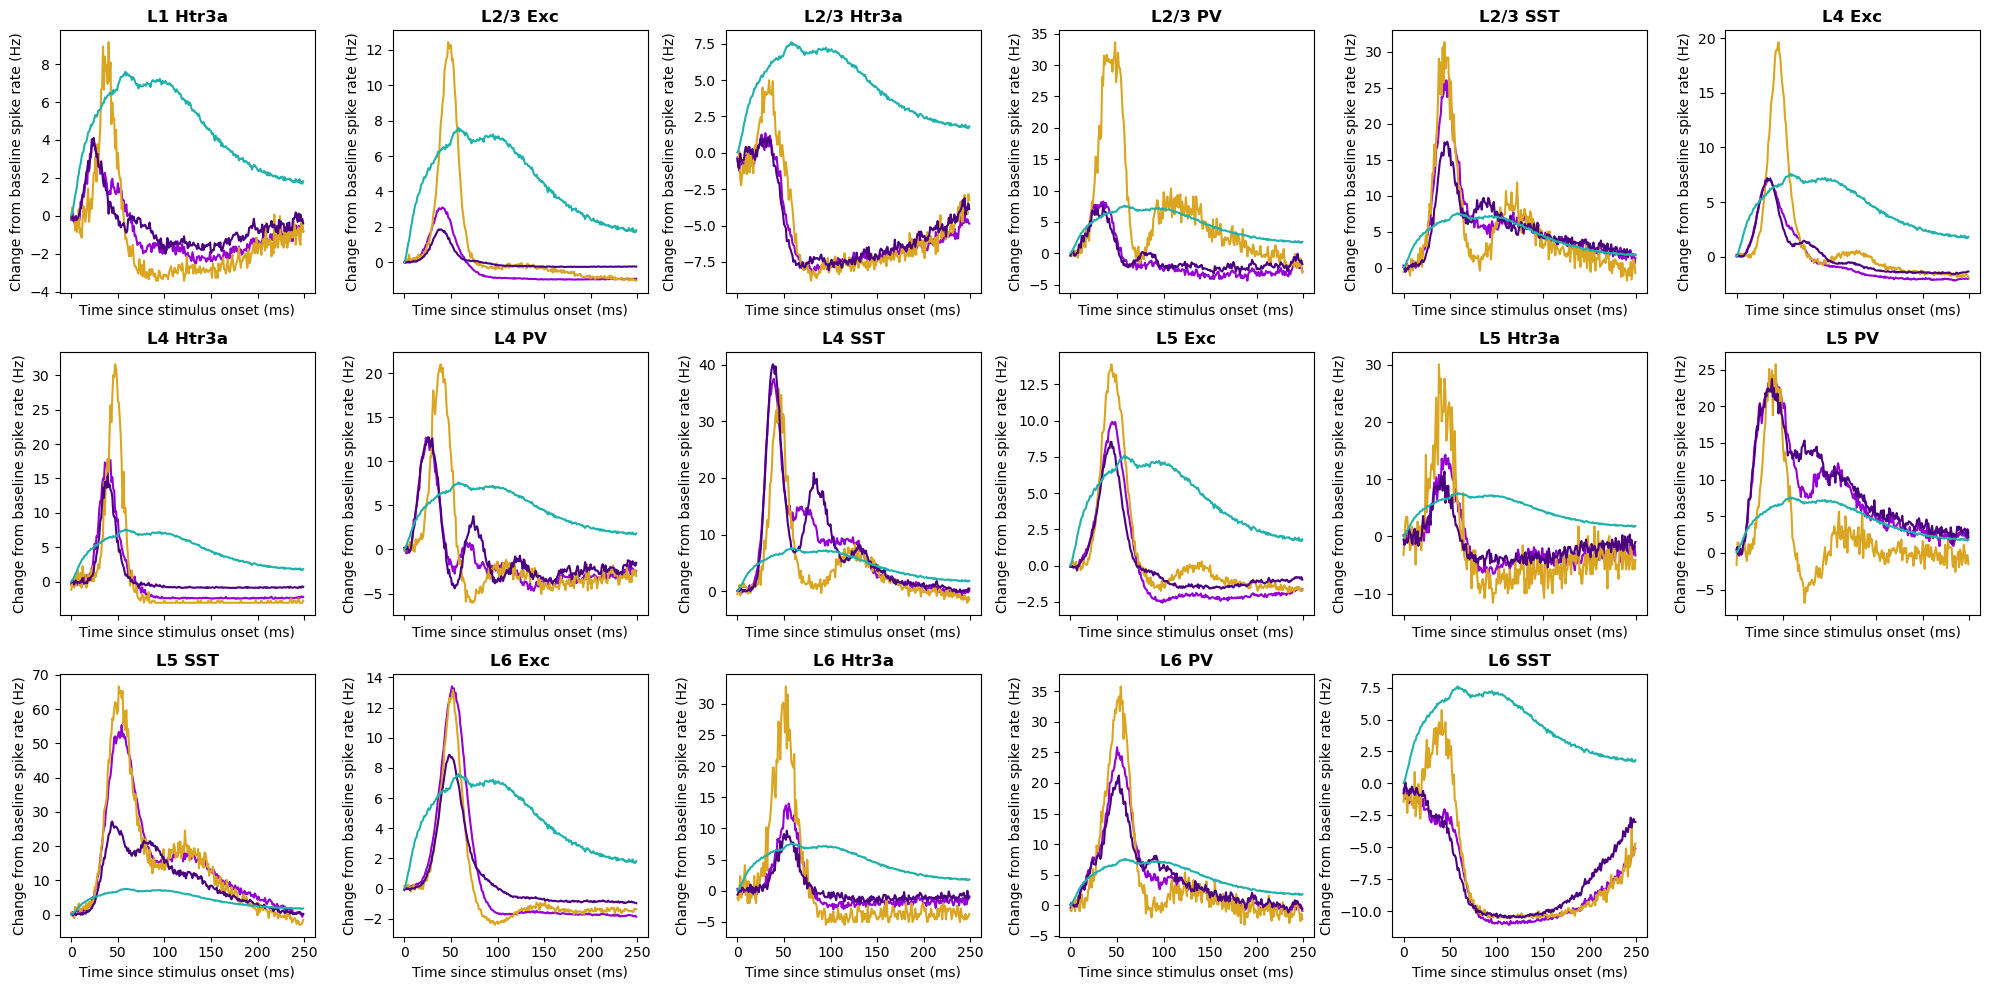

In [73]:
# compute the differences
diff_v1_types = [(np.array(spiking_rates_stim_types_v1[i])- baseline_rate_v1_types[i]) for i in range(len(unique_cell_types))]
diff_lm_types = [(np.array(spiking_rates_stim_types_lm[i])- baseline_rate_lm_types[i]) for i in range(len(unique_cell_types))]
diff_v1_dis_types = [(np.array(spiking_rates_stim_types_v1_dis[i])- baseline_rate_v1_dis_types[i]) for i in range(len(unique_cell_types))]
diff_lgn_types = (np.array(spiking_rates_stim_types_lgn[0])- baseline_rate_lgn_types[0])

colors = ['darkviolet', 'indigo', 'goldenrod', 'lightseagreen']

# plot against time using different unique colors for each neuron type 
# do a 17 different plots using subplots 
fig, axs = plt.subplots(3, 6, figsize=(20,10), sharex=True)
for i, ax in enumerate(axs.flat):
    if i < len(unique_cell_types):
        ax.plot(diff_v1_types[i], label="V1", color = colors[0])
        ax.plot(diff_lm_types[i], label="LM", color = colors[2])
        ax.plot(diff_v1_dis_types[i], label="V1 disconnected", color = colors[1])
        ax.plot(diff_lgn_types, label="LGN", color = colors[3])
        ax.set_title(f'{unique_cell_types[i]}', weight = 'bold')
        ax.set_xlabel('Time since stimulus onset (ms)')
        ax.set_ylabel('Change from baseline spike rate (Hz)')
        # set the legend
        # ax.legend()
        # # print the first element of the array
        # print(f"Neuron type {i+1}:")
        # print(f"V1: {diff_v1_types[i][0]:.2f} Hz")
        # print(f"LM: {diff_lm_types[i][0]:.2f} Hz")
    else:
        ax.axis('off')  # Hide unused subplots
plt.tight_layout()

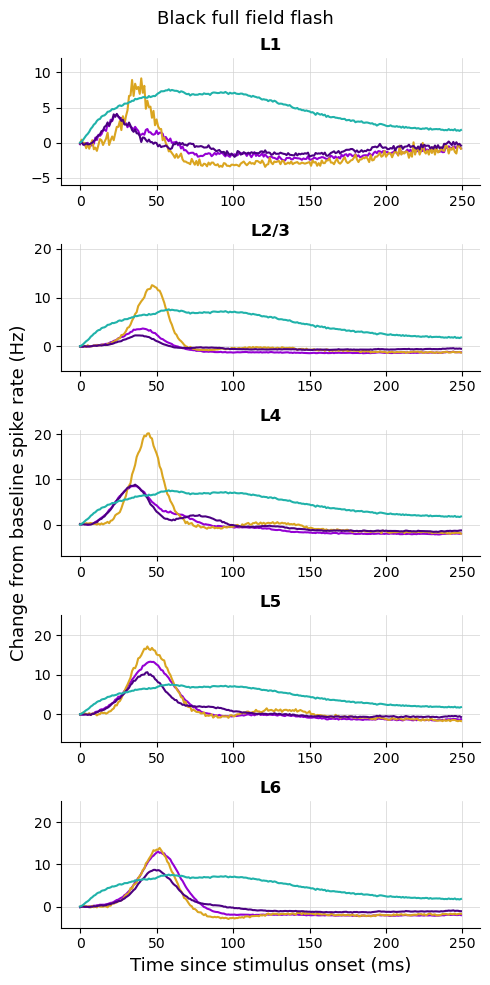

In [76]:
# To do it by layers sum all the data in the types in the same layer weighted with the number of neurons of each type
diff_v1_layers = []
diff_lm_layers = []
diff_v1_dis_layers = []

# number of neurons of each type
n_neurons_v1 = [np.sum(mask) for mask in layer_mask_v1_types]
n_neurons_lm = [np.sum(mask) for mask in layer_mask_lm_types]

# convert data to arrays
diff_v1_types = np.array(diff_v1_types)
diff_lm_types = np.array(diff_lm_types)
diff_v1_dis_types = np.array(diff_v1_dis_types)

# layer 1
diff_v1_layers.append(diff_v1_types[0])
diff_lm_layers.append(diff_lm_types[0])
diff_v1_dis_layers.append(diff_v1_dis_types[0])

# layer 2/3
n_layer23 = n_neurons_v1[1] + n_neurons_v1[2] + n_neurons_v1[3] + n_neurons_v1[4]
element = (diff_v1_types[1]*n_neurons_v1[1] + diff_v1_types[2]*n_neurons_v1[2] + diff_v1_types[3]*n_neurons_v1[3] + diff_v1_types[4]*n_neurons_v1[4])/n_layer23
diff_v1_layers.append(element)

n_layer23 = n_neurons_lm[1] + n_neurons_lm[2] + n_neurons_lm[3] + n_neurons_lm[4]
element = (diff_lm_types[1]*n_neurons_lm[1] + diff_lm_types[2]*n_neurons_lm[2] + diff_lm_types[3]*n_neurons_lm[3] + diff_lm_types[4]*n_neurons_lm[4])/n_layer23
diff_lm_layers.append(element)

n_layer23 = n_neurons_v1[1] + n_neurons_v1[2] + n_neurons_v1[3] + n_neurons_v1[4]
element = (diff_v1_dis_types[1]*n_neurons_v1[1] + diff_v1_dis_types[2]*n_neurons_v1[2] + diff_v1_dis_types[3]*n_neurons_v1[3] + diff_v1_dis_types[4]*n_neurons_v1[4])/n_layer23
diff_v1_dis_layers.append(element)  

# layer 4
n_layer4 = n_neurons_v1[5] + n_neurons_v1[6] + n_neurons_v1[7] + n_neurons_v1[8]
element = (diff_v1_types[5]*n_neurons_v1[5] + diff_v1_types[6]*n_neurons_v1[6] + diff_v1_types[7]*n_neurons_v1[7] + diff_v1_types[8]*n_neurons_v1[8])/n_layer4
diff_v1_layers.append(element)

n_layer4 = n_neurons_lm[5] + n_neurons_lm[6] + n_neurons_lm[7] + n_neurons_lm[8]
element = (diff_lm_types[5]*n_neurons_lm[5] + diff_lm_types[6]*n_neurons_lm[6] + diff_lm_types[7]*n_neurons_lm[7] + diff_lm_types[8]*n_neurons_lm[8])/n_layer4
diff_lm_layers.append(element)

n_layer4 = n_neurons_v1[5] + n_neurons_v1[6] + n_neurons_v1[7] + n_neurons_v1[8]
element = (diff_v1_dis_types[5]*n_neurons_v1[5] + diff_v1_dis_types[6]*n_neurons_v1[6] + diff_v1_dis_types[7]*n_neurons_v1[7] + diff_v1_dis_types[8]*n_neurons_v1[8])/n_layer4
diff_v1_dis_layers.append(element)

# layer 5
n_layer5 = n_neurons_v1[9] + n_neurons_v1[10] + n_neurons_v1[11] + n_neurons_v1[12]
element = (diff_v1_types[9]*n_neurons_v1[9] + diff_v1_types[10]*n_neurons_v1[10] + diff_v1_types[11]*n_neurons_v1[11] + diff_v1_types[12]*n_neurons_v1[12])/n_layer5
diff_v1_layers.append(element)

n_layer5 = n_neurons_lm[9] + n_neurons_lm[10] + n_neurons_lm[11] + n_neurons_lm[12]
element = (diff_lm_types[9]*n_neurons_lm[9] + diff_lm_types[10]*n_neurons_lm[10] + diff_lm_types[11]*n_neurons_lm[11] + diff_lm_types[12]*n_neurons_lm[12])/n_layer5
diff_lm_layers.append(element)

n_layer5 = n_neurons_v1[9] + n_neurons_v1[10] + n_neurons_v1[11] + n_neurons_v1[12]
element = (diff_v1_dis_types[9]*n_neurons_v1[9] + diff_v1_dis_types[10]*n_neurons_v1[10] + diff_v1_dis_types[11]*n_neurons_v1[11] + diff_v1_dis_types[12]*n_neurons_v1[12])/n_layer5
diff_v1_dis_layers.append(element)

# layer 6
n_layer6 = n_neurons_v1[13] + n_neurons_v1[14] + n_neurons_v1[15] + n_neurons_v1[16]
element = (diff_v1_types[13]*n_neurons_v1[13] + diff_v1_types[14]*n_neurons_v1[14] + diff_v1_types[15]*n_neurons_v1[15] + diff_v1_types[16]*n_neurons_v1[16])/n_layer6
diff_v1_layers.append(element)

n_layer6 = n_neurons_lm[13] + n_neurons_lm[14] + n_neurons_lm[15] + n_neurons_lm[16]
element = (diff_lm_types[13]*n_neurons_lm[13] + diff_lm_types[14]*n_neurons_lm[14] + diff_lm_types[15]*n_neurons_lm[15] + diff_lm_types[16]*n_neurons_lm[16])/n_layer6
diff_lm_layers.append(element)

n_layer6 = n_neurons_v1[13] + n_neurons_v1[14] + n_neurons_v1[15] + n_neurons_v1[16]
element = (diff_v1_dis_types[13]*n_neurons_v1[13] + diff_v1_dis_types[14]*n_neurons_v1[14] + diff_v1_dis_types[15]*n_neurons_v1[15] + diff_v1_dis_types[16]*n_neurons_v1[16])/n_layer6
diff_v1_dis_layers.append(element)

# plot against time using different unique colors for each neuron type
# do a 5 different plots using subplots
fig, axs = plt.subplots(5, 1, figsize=(5,10), sharex=True)
layers = ["L1", "L2/3", "L4", "L5", "L6"]

ylim_list = [(-6, 12), (-5, 21), (-7, 21), (-7, 25), (-5, 25)]  # Define your y-limits here

for i, ax in enumerate(axs.flat):
    if i < len(layers):
        ax.plot(diff_v1_layers[i], label="V1", color = colors[0])
        ax.plot(diff_lm_layers[i], label="LM", color = colors[2])
        ax.plot(diff_v1_dis_layers[i], label="V1 disconnected", color = colors[1])
        ax.plot(diff_lgn_types, label="LGN", color = colors[3])
        ax.set_title(f'{layers[i]}', weight = 'bold')
        ax.set_ylim(ylim_list[i])  # Set y-limits here
        # Add a light grey grid
        ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)
        # Remove top and right axes
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        if i == 2:
            ax.set_ylabel('Change from baseline spike rate (Hz)', fontsize = 13)
    else:
        ax.axis('off')  # Hide unused subplots

# Set the x-label for the shared x-axis
axs[-1].set_xlabel('Time since stimulus onset (ms)', fontsize = 13)
fig.suptitle('Black full field flash', fontsize = 13)
plt.tight_layout()

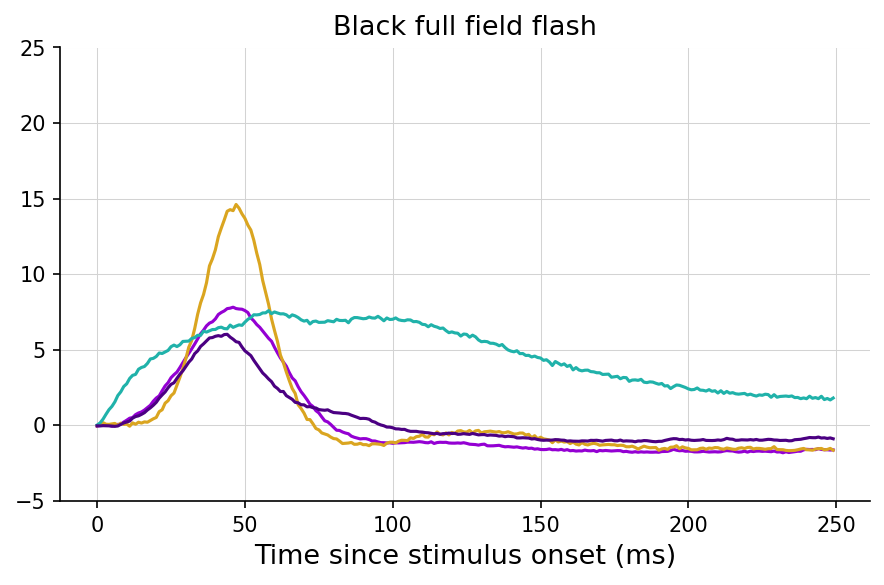

In [75]:
# Now recover the region-wise plot by summing all the data in the layers in the same region weighted with the number of neurons of each layer
n_neurons_layers_v1 = [np.sum(mask) for mask in layer_mask_v1]
n_neurons_layers_lm = [np.sum(mask) for mask in layer_mask_lm]

# convert to arrays
diff_v1_layers = np.array(diff_v1_layers)
diff_lm_layers = np.array(diff_lm_layers)
diff_v1_dis_layers = np.array(diff_v1_dis_layers)

# region v1
n_v1 = n_neurons_layers_v1[0] + n_neurons_layers_v1[1] + n_neurons_layers_v1[2] + n_neurons_layers_v1[3] + n_neurons_layers_v1[4]
element = (diff_v1_layers[0]*n_neurons_layers_v1[0] + diff_v1_layers[1]*n_neurons_layers_v1[1] + diff_v1_layers[2]*n_neurons_layers_v1[2] + diff_v1_layers[3]*n_neurons_layers_v1[3] + diff_v1_layers[4]*n_neurons_layers_v1[4])/n_v1
diff_v1_regions = element

# lm
n_lm = n_neurons_layers_lm[0] + n_neurons_layers_lm[1] + n_neurons_layers_lm[2] + n_neurons_layers_lm[3] + n_neurons_layers_lm[4]
element = (diff_lm_layers[0]*n_neurons_layers_lm[0] + diff_lm_layers[1]*n_neurons_layers_lm[1] + diff_lm_layers[2]*n_neurons_layers_lm[2] + diff_lm_layers[3]*n_neurons_layers_lm[3] + diff_lm_layers[4]*n_neurons_layers_lm[4])/n_lm
diff_lm_regions = element

# v1 dis
n_v1_dis = n_neurons_layers_v1[0] + n_neurons_layers_v1[1] + n_neurons_layers_v1[2] + n_neurons_layers_v1[3] + n_neurons_layers_v1[4]
element = (diff_v1_dis_layers[0]*n_neurons_layers_v1[0] + diff_v1_dis_layers[1]*n_neurons_layers_v1[1] + diff_v1_dis_layers[2]*n_neurons_layers_v1[2] + diff_v1_dis_layers[3]*n_neurons_layers_v1[3] + diff_v1_dis_layers[4]*n_neurons_layers_v1[4])/n_v1_dis
diff_v1_dis_regions = element

# plot against time
plt.figure(figsize=(6,4), dpi = 150)  
plt.plot(diff_v1_regions, label='V1', color='darkviolet')
plt.plot(diff_lm_regions, label='LM', color='goldenrod')
plt.plot(diff_lgn_types, label='LGN', color='lightseagreen')
plt.plot(diff_v1_dis_regions, label='V1 disconnected', color='indigo')
plt.xlabel('Time since stimulus onset (ms)', fontsize = 13)
# plt.ylabel('Change from baseline spike rate (Hz)', fontsize = 13)
# Add a light grey grid
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
# Remove top and right axes
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.title("Black full field flash", fontsize = 13)
plt.ylim(-5,25)
# plt.legend()
plt.tight_layout()
plt.show()

# Compute average firing rate of each neuron in the prestimuli region

In [8]:
# V1 connected
baseline_rate_neurons_v1 = []
for neuron in tqdm(range(0, 51978)):
    # compute average firing rate of each neuron in the first 1000ms
    fr_trials = np.zeros(100)
    for i, trial in enumerate(v1_white):
        spikes = np.sum(trial[:1000, neuron])
        fr = spikes/1000 * 1000 # Hz
        fr_trials[i] = fr

    fr_avg = np.mean(fr_trials)
    baseline_rate_neurons_v1.append(fr_avg)

# save the data
with open('baseline_rate_neurons_v1_white.pkl', 'wb') as f:
    pkl.dump(baseline_rate_neurons_v1, f)

# V1 disconnected
baseline_rate_neurons_v1_dis = []
for neuron in tqdm(range(0, 51978)):
    # compute average firing rate of each neuron in the first 1000ms
    fr_trials = np.zeros(100)
    for i, trial in enumerate(v1_white_disconnected):
        spikes = np.sum(trial[:1000, neuron])
        fr = spikes/1000 * 1000 # Hz
        fr_trials[i] = fr

    fr_avg = np.mean(fr_trials)
    baseline_rate_neurons_v1_dis.append(fr_avg)

# save the data
with open('baseline_rate_neurons_v1_dis_white.pkl', 'wb') as f:
    pkl.dump(baseline_rate_neurons_v1_dis, f)
        


100%|██████████| 51978/51978 [01:29<00:00, 581.17it/s]
